# Analysis the effects of COVID-19 on the education, social life, and mental health of students.

## About Dataset

In this study, a cross-sectional survey is conducted with a sample size of 1182 students of different age groups from different educational institutions in Delhi National Capital Region (NCR).

Citation
* Title: COVID-19 and its impact on education, social life and mental health of students: A Survey
* Journal: Children and youth services review
* url: http://www.sciencedirect.com/science/article/pii/S019074092032288X
* pages: 105866
* year: 2020
* issn: 0190-7409
* doi: https://doi.org/10.1016/j.childyouth.2020.105866

Abstract

The outbreak of COVID-19 affected the lives of all sections of society as people were asked to self-quarantine in their homes to prevent the spread of the virus. The lockdown had serious implications on mental health, resulting in psychological problems including frustration, stress, and depression. In order to explore the impacts of this pandemic on the lives of students, we conducted a survey of a total of 1182 individuals of different age groups from various educational institutes in Delhi - National Capital Region (NCR), India. The article identified the following as the impact of COVID-19 on the students of different age groups: time spent on online classes and self-study, medium used for learning, sleeping habits, daily fitness routine, and the subsequent effects on weight, social life, and mental health. Moreover, our research found that in order to deal with stress and anxiety, participants adopted different coping mechanisms and also sought help from their near ones. Further, the research examined the student’s engagement on social media platforms among different age categories. This study suggests that public authorities should take all the necessary measures to enhance the learning experience by mitigating the negative impacts caused due to the COVID-19 outbreak.

## Analysis Overview

**Analisis ini akan menjawab beberapa pertanyaan:**
1. Bagaimana Situasi Pembelajaran siswa di era pandemi ini?
2. Bagaimana Situasi Kelas Online siswa di era pandemi ini?
3. Bagaimana perilaku belajar siswa pada setiap tingkat sekolah?
4. dsb

Penelitian ini akan mencari tahu:
1. Data statistik tentang siswa di New Delhi dan selain New Delhi pada era pandemi ini.
2. Visualisasi data dari data tersebut.
3. Menemukan beberapa ide dan wawasan berdasarkan hubungan statistik yang muncul dalam visualisasi data atau data statistik untuk menjawab pertanyaan-pertanyaan tersebut.
4. Persentase siswa yang baik dan buruk pada akhirnya, untuk memberikan kesempatan pembaca untuk memiliki kesimpulan atau wawasan mereka sendiri.
5. Modeling yang tepat(?) ---- ```Masih bingung apakah bisa sampai modeling atau tidak perlu dan hanya sampai EDA saja```.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import plotly.express as px
%matplotlib inline
plt.style.use('seaborn-whitegrid')


from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn import under_sampling, over_sampling

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import linear_model
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

#Metric Evaluation
from sklearn.metrics import accuracy_score, recall_score, precision_score,confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics

#Intrepretation Model
!pip install dalex
import dalex as dx

<ipython-input-1-9e96371f52c3>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')
/usr/local/lib/python3.9/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.6.0-py3-none-any.whl size=1046022 sha256=07b69682213c6c7d885f2db0fe65e9475e18818318842c54e7fe925c70b80965
  Stored in directory: /root/.cache/pip/wheels/3e/dc/80/530757389f7587f2b1cd02e5a0a11dd986b232b06eacebcf8d
Successfully built dalex


## Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing/Final Project/COVID-19 Survey Student Responses.csv')
df.sample(5)

,ID,Region of residence,Age of Subject,Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most
409,R416,Outside Delhi-NCR,14,1.0,Good,Smartphone,3.0,1.0,9.0,1.0,None,0,3,Increased,NO,Online gaming,YES,YES,School/college
1115,R1127,Delhi-NCR,14,4.0,Good,Smartphone,3.5,0.0,9.0,2.0,Youtube,3,3,Remain Constant,NO,Listening to music,YES,YES,School/college
878,R887,Delhi-NCR,22,5.0,Average,Smartphone,4.0,1.0,8.0,2.0,Youtube,1,2,Decreased,NO,Listening to music,YES,YES,Travelling
84,R85,Outside Delhi-NCR,21,1.0,Poor,Smartphone,8.0,0.0,10.0,1.0,Whatsapp,0,3,Decreased,NO,Sleep,YES,YES,School/college
591,R598,Delhi-NCR,17,4.0,Very poor,Smartphone,2.0,0.0,10.0,3.0,Facebook,4,2,Remain Constant,NO,Online surfing,YES,YES,School/college


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 19 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   ID                                                                                  1182 non-null   object 
 1   Region of residence                                                                 1182 non-null   object 
 2   Age of Subject                                                                      1182 non-null   int64  
 3   Time spent on Online Class                                                          1182 non-null   float64
 4   Rating of Online Class experience                                                   1158 non-null   object 
 5   Medium for online class                                                             1131 non-null

Observasi:

1. Penelitian ini melibatkan 1182 siswa sebagai sample dengan 19 kolom fitur.
2. Melakukan pengubahan nama kolom agar memudahkan analisis data.
3. Terdapat missing values pada kolom `Rating of Online Class experience` dan `Medium for online class`, yang perlu ditangani.
4. Selain itu, terdapat jenis data yang tidak sesuai pada kolom `Time spent on TV` yang seharusnya merupakan tipe data float.

In [ ]:
# rename setiap kolom agar mudah ditangani

df.rename(
    columns = {
        'Region of residence': 'region',
        'Age of Subject': 'age',
        'Time spent on Online Class': 'time_online_class',
        'Rating of Online Class experience': 'rating_online_class',
        'Medium for online class': 'medium',
        'Time spent on self study': 'time_self_study',
        'Time spent on fitness': 'time_fitness',
        'Time spent on sleep': 'time_sleep',
        'Time spent on social media': 'time_social_media',
        'Prefered social media platform': 'prefered_social_media',
        'Time spent on TV': 'time_tv',
        'Number of meals per day': 'num_meals_per_day',
        'Change in your weight': 'delta_weight',
        'Health issue during lockdown': 'health_issue_in_lockdown',
        'Stress busters': 'stress_busters',
        'Time utilized': 'time_utilized',
        'Do you find yourself more connected with your family, close friends , relatives  ?': 'more_family_connected',
        'What you miss the most': 'miss_most'}, inplace = True)

del df['ID']  # menghapus kolom ID karena tidak digunakan

df.head(3)

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,Delhi-NCR,21,2.0,Good,Laptop/Desktop,4.0,0.0,7.0,3.0,Linkedin,1,4,Increased,NO,Cooking,YES,YES,School/college
1,Delhi-NCR,21,0.0,Excellent,Smartphone,0.0,2.0,10.0,3.0,Youtube,0,3,Decreased,NO,Scrolling through social media,YES,NO,Roaming around freely
2,Delhi-NCR,20,7.0,Very poor,Laptop/Desktop,3.0,0.0,6.0,2.0,Linkedin,0,3,Remain Constant,NO,Listening to music,NO,YES,Travelling


### DATASET ATRIBUTES

variabel atau kolom-kolom yang digunakan:

1. Region of residence (```region```): informasi tentang wilayah tempat tinggal responden.
2. Age of Subject (```age```): informasi tentang usia responden.
3. Time spent on Online Class (```time_online_class```): informasi tentang berapa lama waktu yang dihabiskan responden untuk mengikuti kelas online.
4. Rating of Online Class experience (```rating_online_class```): informasi tentang bagaimana pengalaman responden dalam mengikuti kelas online.
5. Medium for online class (```medium```): informasi tentang platform apa yang digunakan untuk mengikuti kelas online.
6. Time spent on self study (```time_self_study```): informasi tentang berapa lama waktu yang dihabiskan responden untuk belajar mandiri.
7. Time spent on fitness (```time_fitness```): informasi tentang berapa lama waktu yang dihabiskan responden untuk berolahraga.
8. Time spent on sleep (```time_sleep```): informasi tentang berapa lama waktu tidur responden.
9. Time spent on social media (```time_social_media```): informasi tentang berapa lama waktu yang dihabiskan responden untuk menggunakan media sosial.
10. Prefered social media platform (```prefered_social_media```): informasi tentang platform media sosial yang paling disukai responden.
11. Time spent on TV (```time_tv```): informasi tentang berapa lama waktu yang dihabiskan responden untuk menonton televisi.
12. Number of meals per day (```num_meals_per_day```): informasi tentang berapa kali responden makan dalam sehari.
13. Change in your weight (```delta_weight```): informasi tentang perubahan berat badan responden selama masa pandemi.
14. Health issue during lockdown (```health_issue_in_lockdown```): informasi tentang masalah kesehatan apa yang dihadapi responden selama masa lockdown.
15. Stress busters (```stress_busters```): informasi tentang cara-cara yang digunakan responden untuk mengurangi stres.
16. Time utilized (```time_utilized```): informasi tentang bagaimana waktu responden dihabiskan selama masa pandemi.
17. Do you find yourself more connected with your family, close friends, relatives? (```more_family_connected```): informasi tentang sejauh mana responden merasa lebih terhubung dengan keluarga, teman dekat, atau kerabat selama masa pandemi.
18. What you miss the most (```miss_most```): informasi tentang apa yang paling dirindukan oleh responden selama masa pandemi.

## Statistic Desctiptive

### Numerical Data

In [ ]:
df.describe()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,num_meals_per_day
count,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000,1182.000000
mean,20.165821,3.208841,2.911591,0.765821,7.871235,2.365694,2.917936
std,5.516467,2.101756,2.140590,0.724451,1.615762,1.767336,0.828698
min,7.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,2.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,3.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,15.000000,10.000000,8.000000


### Categorical Data

In [ ]:
# Statistic descriptive for object data
df.select_dtypes('object').describe()

,region,rating_online_class,medium,prefered_social_media,time_tv,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
count,1182,1158,1131,1182,1182,1182,1182,1182,1182,1182,1182
unique,2,5,5,16,25,3,2,86,2,2,51
top,Delhi-NCR,Very poor,Laptop/Desktop,Instagram,0,Remain Constant,NO,Listening to music,NO,YES,School/college
freq,721,413,545,352,441,535,1021,276,608,831,379


### Observasi:

Berdasarkan data tersebut, dapat dilihat pada kolom ```Age``` bahwa sampel yang diambil terdiri dari 1182 orang, dengan rentang usia antara 7 hingga 59 tahun yang menunjukkan bahwa sebaran usia peserta cukup bervariasi. Oleh karena itu, akan dilakukan analisis lebih lanjut berdasarkan jenjang pendidikan berdasarkan usia peserta. Adapun klasifikasi peserta berdasarkan usia adalah sebagai berikut:
* Usia 0 - 11 tahun (Siswa Sekolah Dasar) sebagai (ES)
* Usia 12 - 14 tahun (Siswa Sekolah Menengah Pertama) sebagai (JHS)
* Usia 15 - 17 tahun (Siswa Sekolah Menengah Atas) sebagai (SHS)
* Usia di atas 18 tahun (Mahasiswa) sebagai (CS)

Dengan adanya klasifikasi tersebut, akan mempermudah dalam melakukan analisis terhadap pengaruh pandemi COVID-19 pada kegiatan belajar-mengajar dan aspek lainnya pada masing-masing jenjang pendidikan.

Pada kolom ```Rating of Online Class```, terdapat lima kategori rating yang perlu diubah menjadi variabel numerik agar dapat diolah dalam analisis data. Untuk mengubah variabel tersebut, diberikan ketentuan sebagai berikut:
* Excellent sama dengan 5
* Good sama dengan 4
* Average sama dengan 3
* Poor sama dengan 2
* Very Poor sama dengan 1

Dengan demikian, setiap kategori rating akan diwakili oleh nilai numerik yang sesuai. Hal ini memudahkan dalam melakukan pengolahan data, seperti perhitungan rata-rata, median, dan lain sebagainya.

```Membuat kolom baru, apakah siswa memiliki waktu tidur yang normal?```

Apa itu waktu tidur normal dalam analisis ini?
Akademi Kedokteran Amerika merekomendasikan bahwa anak-anak berusia 6-12 tahun seharusnya tidur 9-12 jam per 24 jam dan remaja berusia 13-18 tahun harus tidur 8-10 jam per 24 jam.

Jika waktu tidur subjek tidak tergolong dalam waktu tidur normal, maka masukkan nilai "YES", jika tidak, masukkan nilai "NO".

```Membuat kolom baru, Apakah siswa lebih banyak menghabiskan waktu di media sosial daripada belajar sendiri?```

Kolom ini didasarkan pada kolom waktu yang dihabiskan di media sosial dan waktu yang dihabiskan belajar sendiri, jika siswa memiliki lebih banyak waktu untuk media sosial, maka masukkan "YES".

```Mengubah type data untuk kolom time_tv menjadi float```

In [ ]:
# Menampilkan value pada setiap kolom
for col in df.columns:
    print(f"=== {col}===")
    display(df[col].value_counts())

=== region===


Delhi-NCR            721
Outside Delhi-NCR    461
Name: region, dtype: int64

=== age===


20    211
21    188
19    138
22     93
16     67
18     66
17     58
14     48
13     48
23     44
15     37
12     29
24     23
40     14
26     12
25     12
34     10
32     10
30      8
28      7
27      6
11      6
33      5
36      5
38      4
35      4
10      4
31      4
29      4
9       2
43      2
8       2
37      2
42      1
50      1
45      1
7       1
44      1
46      1
52      1
59      1
39      1
Name: age, dtype: int64

=== time_online_class===


4.00     222
2.00     201
3.00     177
5.00     142
0.00     132
1.00     114
6.00      91
7.00      31
8.00      31
0.50      10
0.75       7
1.50       5
9.00       5
10.00      4
5.50       3
2.50       2
0.70       1
3.50       1
0.80       1
0.10       1
7.50       1
Name: time_online_class, dtype: int64

=== rating_online_class===


Very poor    413
Average      387
Good         230
Excellent     98
Poor          30
Name: rating_online_class, dtype: int64

=== medium===


Laptop/Desktop                  545
Smartphone                      539
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: medium, dtype: int64

=== time_self_study===


2.0     346
3.0     202
1.0     180
4.0     151
0.0      76
5.0      76
6.0      53
8.0      29
10.0     15
7.0      14
0.5       9
1.5       7
2.5       7
12.0      5
3.5       3
9.0       2
17.0      1
18.0      1
2.3       1
1.2       1
6.5       1
11.0      1
4.5       1
Name: time_self_study, dtype: int64

=== time_fitness===


1.00    550
0.00    419
2.00    119
0.50     53
3.00     25
0.25      6
0.30      5
0.60      2
5.00      1
2.50      1
4.00      1
Name: time_fitness, dtype: int64

=== time_sleep===


8.0     390
7.0     256
6.0     171
9.0     132
10.0     96
5.0      46
12.0     42
11.0     25
13.0      5
4.0       5
7.5       4
6.5       3
14.0      2
15.0      1
7.8       1
6.7       1
8.5       1
8.3       1
Name: time_sleep, dtype: int64

=== time_social_media===


1.00     343
2.00     335
3.00     169
4.00     112
5.00      58
0.00      36
0.50      34
6.00      29
1.50      15
10.00     14
8.00      11
7.00      10
0.30       4
0.10       2
9.00       2
0.40       2
0.15       1
3.50       1
0.60       1
0.75       1
1.30       1
0.25       1
Name: time_social_media, dtype: int64

=== prefered_social_media===


Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
Name: prefered_social_media, dtype: int64

=== time_tv===


0        441
1        306
2        207
0.5       78
3         50
4         24
1.5       14
0.3       12
5         10
6          9
N          7
0.1        4
No tv      3
4.5        2
7          2
8          2
           2
2.5        2
0.25       1
n          1
0.6        1
15         1
0.75       1
3.5        1
0.4        1
Name: time_tv, dtype: int64

=== num_meals_per_day===


3    610
2    287
4    229
1     41
5      8
7      4
6      2
8      1
Name: num_meals_per_day, dtype: int64

=== delta_weight===


Remain Constant    535
Increased          438
Decreased          209
Name: delta_weight, dtype: int64

=== health_issue_in_lockdown===


NO     1021
YES     161
Name: health_issue_in_lockdown, dtype: int64

=== stress_busters===


Listening to music                276
Online gaming                     175
Watching web series               102
Reading books                      77
Scrolling through social media     74
                                 ... 
I run                               1
Running                             1
Football                            1
singing                             1
Watching YouTube                    1
Name: stress_busters, Length: 86, dtype: int64

=== time_utilized===


NO     608
YES    574
Name: time_utilized, dtype: int64

=== more_family_connected===


YES    831
NO     351
Name: more_family_connected, dtype: int64

=== miss_most===


School/college                                                                                                                                                                                                              379
Friends , relatives                                                                                                                                                                                                         223
Travelling                                                                                                                                                                                                                  183
Roaming around freely                                                                                                                                                                                                       149
Eating outside                                                                                          

## Data Preprocessing

### Handling missing values & cleaning the data

In [ ]:
# Cek missing value pada masing-masing kolom

data_nan = df.isna().sum().reset_index()
data_nan.columns = ['feature','missing_value']
data_nan['percentage'] = round((data_nan['missing_value']/len(df))*100,3)
data_nan = data_nan.sort_values('percentage', ascending=False).reset_index(drop=True)
data_nan = data_nan[data_nan['percentage']>0]
data_nan

,feature,missing_value,percentage
0,medium,51,4.315
1,rating_online_class,24,2.030


Terdapat 51 missing value pada kolom Medium dan 24 missing value pada kolom rating online class

In [ ]:
#Menampilkan unique values untuk mengetahui missing value seperti apa yang ada pada setiap kolomnya

print('Unique value untuk rating online class:')
print(df['rating_online_class'].unique(), "\n")
print('Unique value untuk medium:')
print(df['medium'].unique())

Unique value untuk rating online class:
['Good' 'Excellent' 'Very poor' 'Average' nan 'Poor'] 

Unique value untuk medium:
['Laptop/Desktop' 'Smartphone' 'Tablet' nan 'Any Gadget'
 'Smartphone or Laptop/Desktop']


Mengisi value yang missing atau "nan" pada kolom ```rating_online_class``` dan ```medium``` dengan menggunakan strategi nilai yang paling sering muncul kemudian dicek ulang apakah masih ada missing value pada kolom tersebut.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent').fit(df[['rating_online_class', 'medium']])
df[['rating_online_class', 'medium']] = imputer.transform(df[['rating_online_class', 'medium']])
df[['rating_online_class', 'medium']].isnull().sum()

rating_online_class    0
medium                 0
dtype: int64

Handling missing value, done!

#### Cleaning data

Cleaning data dengan cara mengubah value pada masing-masing kolom yang masih memiliki nilai atau value dan maksud yang sama

##### Kolom medium

In [ ]:
df['medium'].value_counts()

Laptop/Desktop                  596
Smartphone                      539
Tablet                           37
Any Gadget                        5
Smartphone or Laptop/Desktop      5
Name: medium, dtype: int64

In [ ]:
df['medium'].replace('Smartphone or Laptop/Desktop', 'Any Gadget', inplace = True)
df['medium'].value_counts()

Laptop/Desktop    596
Smartphone        539
Tablet             37
Any Gadget         10
Name: medium, dtype: int64

##### Kolom prefered sosial media

In [ ]:
df['prefered_social_media'].value_counts()

Instagram    352
Whatsapp     336
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          17
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
None           1
Quora          1
Talklife       1
WhatsApp       1
Name: prefered_social_media, dtype: int64

In [ ]:
df['prefered_social_media'].unique()

array(['Linkedin', 'Youtube', 'Instagram', 'Whatsapp', 'None', 'Reddit',
       'Snapchat', 'Omegle', 'Twitter', 'Telegram', 'Facebook', 'Elyment',
       'None ', 'Quora', 'Talklife', 'WhatsApp'], dtype=object)

In [ ]:
df['prefered_social_media'].replace('None ', 'None', inplace = True)
df['prefered_social_media'].replace('Whatsapp', 'WhatsApp', inplace = True)
df['prefered_social_media'].value_counts()

Instagram    352
WhatsApp     337
Youtube      314
Linkedin      61
Facebook      52
Twitter       28
None          18
Snapchat       8
Reddit         5
Telegram       3
Omegle         1
Elyment        1
Quora          1
Talklife       1
Name: prefered_social_media, dtype: int64

##### Kolom time_tv

In [ ]:
#Kolom time_tv
df['time_tv'].unique()

array(['1', '0', '3', '0.5', 'n', '2', '4.5', '1.5', 'N', '4', '0.3', '5',
       'No tv', '0.1', '0.25', '6', '0.6', '7', '8', '15', ' ', '0.75',
       '2.5', '3.5', '0.4'], dtype=object)

Catatan:

1. Terdapat banyak tanggapan yang berbeda.
2. Mengganti value seperti 'n', 'N', 'tidak', kosong, dll. dengan 0.
3. Mengubah tipe data untuk kolom ini menjadi float daripada objek.

In [ ]:
df['time_tv'].replace({'n':'0', 'N':'0', 'No tv':'0', ' ':'0', 0:'0'}, inplace = True)

# ubah data type time_tv menjadi float
df['time_tv'] = df['time_tv'].astype(float)

In [ ]:
#Kolom time_tv
df['time_tv'].unique()

array([ 1.  ,  0.  ,  3.  ,  0.5 ,  2.  ,  4.5 ,  1.5 ,  4.  ,  0.3 ,
        5.  ,  0.1 ,  0.25,  6.  ,  0.6 ,  7.  ,  8.  , 15.  ,  0.75,
        2.5 ,  3.5 ,  0.4 ])

In [ ]:
df['time_tv'].value_counts()

0.00     454
1.00     306
2.00     207
0.50      78
3.00      50
4.00      24
1.50      14
0.30      12
5.00      10
6.00       9
0.10       4
4.50       2
7.00       2
8.00       2
2.50       2
0.25       1
0.60       1
15.00      1
0.75       1
3.50       1
0.40       1
Name: time_tv, dtype: int64

##### Kolom stress busters

In [ ]:
# cleaning pada Kolom stess busters
df['stress_busters'].unique()

array(['Cooking', 'Scrolling through social media', 'Listening to music',
       'Watching web series', 'Social Media',
       'Coding and studying for exams', 'Online surfing',
       'live stream watching', 'Reading', 'Online gaming',
       'Reading books', 'Dancing', 'Talking with friends ',
       'Talking to your relatives',
       'sketching,reading books,meditation,songs',
       'Watching orgasm releasing videos', 'Sleep', 'Crying',
       'Many of these', 'Web Series', 'drawing ', 'Meditation', 'Cricket',
       'Anime Manga', 'Sleeping', 'Sketching and writing', 'Writing',
       'pubg', 'Talking', 'Workout ', 'Whatever want', 'Indoor Games',
       'watching movies,reading books,games,listening to music,sleep,dancing',
       'gardening cartoon',
       'listening to music,reading books and dancing.',
       'Dont get distreessed',
       ' listening music, motion design, graphic design, sleeping.',
       'Business', 'Many among these ', 'Talk with childhood friends.',
   

In [ ]:
df['stress_busters'].replace([
    ['Sleep'],
    ['Scrolling through social media'],
    ['Reading books'],
    ['Talking to your relatives']

], ['Sleeping', 'Social Media', 'Reading', 'Talking'], inplace = True)

In [ ]:
df['stress_busters'].replace([
    'Exercising','Exercise','Gym','Workout ','Cardio',
    'workout','working out and some physical activity'

],'Exercise/Gym', inplace = True)

In [ ]:
df['stress_busters'].replace([
    'Talking with friends ','Talking','Talking to friends','With a friend',
    'Calling friends','Taking with parents','Talk with childhood friends.',

], 'Talking', inplace = True)

In [ ]:
df['stress_busters'].replace([
    'Listening to music',' listening music, motion design, graphic design, sleeping.',
    'singing','Workout and listening music',
    'Both listining music and scrolling down social media',
    'Listening to music and reading books both . ',
    'Poetry, writing books and novels , listening to music too'

], 'Music', inplace = True)

In [ ]:
df['stress_busters'].replace([
    'Online surfing','live stream watching','Watching orgasm releasing videos','Anime Manga',
    'Watching ted talks and music and books','Watching YouTube ','Internet',
    'Online gaming , surfing and listening to music ','Web Series','Watching web series',
    'Netflix, Friends and Books','Youtube'

], 'Internet Surfing', inplace=True)

In [ ]:
df['stress_busters'].replace([
    'Coding and studying for exams',
    'sketching,reading books,meditation,songs',
    'Many of these',
    'All reading books watching web series listening to music and talking to friends',
    'Many among these ',
    'Do some home related stuff',
    'watching movies,reading books,games,listening to music,sleep,dancing',
    'Reading books, music, exercise',
    'Whatever want','listening to music,reading books and dancing.',

], 'Many Things', inplace=True)

In [ ]:
df['stress_busters'].replace([
    'Reading','drawing','Dancing','Meditation','Driving','Drawing, painting','Forming ','Painting','Sketching',
    'Sports','Painting ','Drawing','Football','Business','Running','I run','Drawing and painting and sketching',
    'I play Rubiks cube','Indoor Games','I cant de-stress myslef','Writing my own Comics & novels',
    'I have no problem of stress ','Sketching and writing','By engaging in my work.', 'Work',
    'Painting,. Sewing','Crying','Dont get distreessed','gardening cartoon','Playing ','no stress',
    'Cricket','No able to reduce the stress ','drawing ','Writing'

], 'Doing Extra Activities', inplace=True)

In [ ]:
df['stress_busters'].replace([
    'Sleeping, Online games',
    'pubg'

], 'Online gaming', inplace=True)

In [ ]:
print(df['stress_busters'].unique(), "\n")
print(df['stress_busters'].value_counts())

['Cooking' 'Social Media' 'Music' 'Internet Surfing' 'Many Things'
 'Doing Extra Activities' 'Online gaming' 'Talking' 'Sleeping'
 'Exercise/Gym'] 

Music                     282
Doing Extra Activities    209
Internet Surfing          183
Online gaming             177
Sleeping                  105
Social Media              100
Talking                    62
Cooking                    41
Exercise/Gym               13
Many Things                10
Name: stress_busters, dtype: int64


##### Kolom miss most

In [ ]:
df['miss_most'].unique()

array(['School/college', 'Roaming around freely', 'Travelling',
       'Friends , relatives', 'Eating outside', 'Colleagues', 'Job',
       'Nothing this is my usual life', 'Gym', 'All of them',
       'Friends and School', 'Friends,Romaing and traveling',
       'Only friends', 'Taking kids to park', 'All of the above ',
       'All the above', 'Internet', 'Going to the movies', 'Nothing',
       'school, relatives and friends', 'All ', 'All', 'all of the above',
       'Nothing ', 'Eating outside and friends.', 'All above',
       'Nah, this is my usual lifestyle anyway, just being lazy....',
       'Family ', 'Football', 'Normal life',
       'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
       'My normal routine', 'ALL', 'NOTHING', 'Being social ',
       'Previous mistakes', 'all', 'nothing', 'Playing', '.',
 

In [ ]:
df['miss_most'].replace(
    [
        'All the above',
        'All of the above ',
        'everything',
        'All above',
        'all of the above',
        'ALL','all',
        'All of the above',
        'all of them',
        'All of them',
        'All '
    ],

    #diganti menjadi
    'All', inplace=True)

In [ ]:
df['miss_most'].replace(
    [
        'NOTHING',
        'Nothing this is my usual life',
        'To stay alone. ',
        'Nothing ',
        'Nah, this is my usual lifestyle anyway, just being lazy....',
        'Normal life',
        'My normal routine',
        'nothing',
        'Job',
        'I have missed nothing',
        'Previous mistakes',
        '.',
        'I have missed nothing ',
        'Internet'
    ],
    #diganti menjadi
    'Nothing', inplace=True)

In [ ]:
df['miss_most'].replace(
    [
        'Only friends',
        'Friends , relatives',
        'relatives and friends',
        'Family ',
        'The idea of being around fun loving people but this time has certainly made us all to reconnect (and fill the gap if any) with our families and relatives so it is fun but certainly we do miss hanging out with friends',
        'Family',
        'Friends, relatives & travelling',
        'Travelling & Friends',
        'School and friends',
        'Friends and School',
        'Eating outside and friends.',
        'School and friends.',
        'school, relatives and friends',
        'School and my school friends'
    ],
    #diganti menjadi
    'Friends/Relatives/Family', inplace=True)

In [ ]:
df['miss_most'].replace(
    [
        'Playing',
        'Roaming around freely',
        'Taking kids to park',
        'Being social ',
        'Friends and roaming around freely',
        'Friends,Romaing and traveling',
        'Metro',
        'Going to the movies',
        'Gym',
        'Football',
        'Badminton in court'
    ],
    #diganti menjadi
    'Passing Time Outside', inplace=True)

In [ ]:
print(df['miss_most'].unique(), "\n")
print(df['miss_most'].value_counts())

['School/college' 'Passing Time Outside' 'Travelling'
 'Friends/Relatives/Family' 'Eating outside' 'Colleagues' 'Nothing' 'All'] 

School/college              379
Friends/Relatives/Family    235
Travelling                  183
Passing Time Outside        162
Eating outside              104
Colleagues                   67
Nothing                      26
All                          26
Name: miss_most, dtype: int64


##### Upper text features

In [ ]:
#Upper text feature
data = df.copy()
df = df.apply(lambda x: x.str.upper() if x.dtype == "object" else x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    1182 non-null   object 
 1   age                       1182 non-null   int64  
 2   time_online_class         1182 non-null   float64
 3   rating_online_class       1182 non-null   object 
 4   medium                    1182 non-null   object 
 5   time_self_study           1182 non-null   float64
 6   time_fitness              1182 non-null   float64
 7   time_sleep                1182 non-null   float64
 8   time_social_media         1182 non-null   float64
 9   prefered_social_media     1182 non-null   object 
 10  time_tv                   1182 non-null   float64
 11  num_meals_per_day         1182 non-null   int64  
 12  delta_weight              1182 non-null   object 
 13  health_issue_in_lockdown  1182 non-null   object 
 14  stress_b

In [ ]:
df.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,DELHI-NCR,21,2.0,GOOD,LAPTOP/DESKTOP,4.0,0.0,7.0,3.0,LINKEDIN,1.0,4,INCREASED,NO,COOKING,YES,YES,SCHOOL/COLLEGE
1,DELHI-NCR,21,0.0,EXCELLENT,SMARTPHONE,0.0,2.0,10.0,3.0,YOUTUBE,0.0,3,DECREASED,NO,SOCIAL MEDIA,YES,NO,PASSING TIME OUTSIDE
2,DELHI-NCR,20,7.0,VERY POOR,LAPTOP/DESKTOP,3.0,0.0,6.0,2.0,LINKEDIN,0.0,3,REMAIN CONSTANT,NO,MUSIC,NO,YES,TRAVELLING
3,DELHI-NCR,20,3.0,VERY POOR,SMARTPHONE,2.0,1.0,6.0,5.0,INSTAGRAM,0.0,3,DECREASED,NO,INTERNET SURFING,NO,NO,FRIENDS/RELATIVES/FAMILY
4,DELHI-NCR,21,3.0,GOOD,LAPTOP/DESKTOP,3.0,1.0,8.0,3.0,INSTAGRAM,1.0,4,REMAIN CONSTANT,NO,SOCIAL MEDIA,NO,NO,TRAVELLING


In [ ]:
for col in df.columns:
    print(f"=== {col}===")
    display(df[col].value_counts())

=== region===


DELHI-NCR            721
OUTSIDE DELHI-NCR    461
Name: region, dtype: int64

=== age===


20    211
21    188
19    138
22     93
16     67
18     66
17     58
14     48
13     48
23     44
15     37
12     29
24     23
40     14
26     12
25     12
34     10
32     10
30      8
28      7
27      6
11      6
33      5
36      5
38      4
35      4
10      4
31      4
29      4
9       2
43      2
8       2
37      2
42      1
50      1
45      1
7       1
44      1
46      1
52      1
59      1
39      1
Name: age, dtype: int64

=== time_online_class===


4.00     222
2.00     201
3.00     177
5.00     142
0.00     132
1.00     114
6.00      91
7.00      31
8.00      31
0.50      10
0.75       7
1.50       5
9.00       5
10.00      4
5.50       3
2.50       2
0.70       1
3.50       1
0.80       1
0.10       1
7.50       1
Name: time_online_class, dtype: int64

=== rating_online_class===


VERY POOR    437
AVERAGE      387
GOOD         230
EXCELLENT     98
POOR          30
Name: rating_online_class, dtype: int64

=== medium===


LAPTOP/DESKTOP    596
SMARTPHONE        539
TABLET             37
ANY GADGET         10
Name: medium, dtype: int64

=== time_self_study===


2.0     346
3.0     202
1.0     180
4.0     151
0.0      76
5.0      76
6.0      53
8.0      29
10.0     15
7.0      14
0.5       9
1.5       7
2.5       7
12.0      5
3.5       3
9.0       2
17.0      1
18.0      1
2.3       1
1.2       1
6.5       1
11.0      1
4.5       1
Name: time_self_study, dtype: int64

=== time_fitness===


1.00    550
0.00    419
2.00    119
0.50     53
3.00     25
0.25      6
0.30      5
0.60      2
5.00      1
2.50      1
4.00      1
Name: time_fitness, dtype: int64

=== time_sleep===


8.0     390
7.0     256
6.0     171
9.0     132
10.0     96
5.0      46
12.0     42
11.0     25
13.0      5
4.0       5
7.5       4
6.5       3
14.0      2
15.0      1
7.8       1
6.7       1
8.5       1
8.3       1
Name: time_sleep, dtype: int64

=== time_social_media===


1.00     343
2.00     335
3.00     169
4.00     112
5.00      58
0.00      36
0.50      34
6.00      29
1.50      15
10.00     14
8.00      11
7.00      10
0.30       4
0.10       2
9.00       2
0.40       2
0.15       1
3.50       1
0.60       1
0.75       1
1.30       1
0.25       1
Name: time_social_media, dtype: int64

=== prefered_social_media===


INSTAGRAM    352
WHATSAPP     337
YOUTUBE      314
LINKEDIN      61
FACEBOOK      52
TWITTER       28
NONE          18
SNAPCHAT       8
REDDIT         5
TELEGRAM       3
OMEGLE         1
ELYMENT        1
QUORA          1
TALKLIFE       1
Name: prefered_social_media, dtype: int64

=== time_tv===


0.00     454
1.00     306
2.00     207
0.50      78
3.00      50
4.00      24
1.50      14
0.30      12
5.00      10
6.00       9
0.10       4
4.50       2
7.00       2
8.00       2
2.50       2
0.25       1
0.60       1
15.00      1
0.75       1
3.50       1
0.40       1
Name: time_tv, dtype: int64

=== num_meals_per_day===


3    610
2    287
4    229
1     41
5      8
7      4
6      2
8      1
Name: num_meals_per_day, dtype: int64

=== delta_weight===


REMAIN CONSTANT    535
INCREASED          438
DECREASED          209
Name: delta_weight, dtype: int64

=== health_issue_in_lockdown===


NO     1021
YES     161
Name: health_issue_in_lockdown, dtype: int64

=== stress_busters===


MUSIC                     282
DOING EXTRA ACTIVITIES    209
INTERNET SURFING          183
ONLINE GAMING             177
SLEEPING                  105
SOCIAL MEDIA              100
TALKING                    62
COOKING                    41
EXERCISE/GYM               13
MANY THINGS                10
Name: stress_busters, dtype: int64

=== time_utilized===


NO     608
YES    574
Name: time_utilized, dtype: int64

=== more_family_connected===


YES    831
NO     351
Name: more_family_connected, dtype: int64

=== miss_most===


SCHOOL/COLLEGE              379
FRIENDS/RELATIVES/FAMILY    235
TRAVELLING                  183
PASSING TIME OUTSIDE        162
EATING OUTSIDE              104
COLLEAGUES                   67
NOTHING                      26
ALL                          26
Name: miss_most, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   region                    1182 non-null   object 
 1   age                       1182 non-null   int64  
 2   time_online_class         1182 non-null   float64
 3   rating_online_class       1182 non-null   object 
 4   medium                    1182 non-null   object 
 5   time_self_study           1182 non-null   float64
 6   time_fitness              1182 non-null   float64
 7   time_sleep                1182 non-null   float64
 8   time_social_media         1182 non-null   float64
 9   prefered_social_media     1182 non-null   object 
 10  time_tv                   1182 non-null   float64
 11  num_meals_per_day         1182 non-null   int64  
 12  delta_weight              1182 non-null   object 
 13  health_issue_in_lockdown  1182 non-null   object 
 14  stress_b

In [ ]:
df.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most
0,DELHI-NCR,21,2.0,GOOD,LAPTOP/DESKTOP,4.0,0.0,7.0,3.0,LINKEDIN,1.0,4,INCREASED,NO,COOKING,YES,YES,SCHOOL/COLLEGE
1,DELHI-NCR,21,0.0,EXCELLENT,SMARTPHONE,0.0,2.0,10.0,3.0,YOUTUBE,0.0,3,DECREASED,NO,SOCIAL MEDIA,YES,NO,PASSING TIME OUTSIDE
2,DELHI-NCR,20,7.0,VERY POOR,LAPTOP/DESKTOP,3.0,0.0,6.0,2.0,LINKEDIN,0.0,3,REMAIN CONSTANT,NO,MUSIC,NO,YES,TRAVELLING
3,DELHI-NCR,20,3.0,VERY POOR,SMARTPHONE,2.0,1.0,6.0,5.0,INSTAGRAM,0.0,3,DECREASED,NO,INTERNET SURFING,NO,NO,FRIENDS/RELATIVES/FAMILY
4,DELHI-NCR,21,3.0,GOOD,LAPTOP/DESKTOP,3.0,1.0,8.0,3.0,INSTAGRAM,1.0,4,REMAIN CONSTANT,NO,SOCIAL MEDIA,NO,NO,TRAVELLING


Data sudah menjadi lebih bersih.

### Handling Duplicated Value

In [ ]:
# Check duplicated value
df.duplicated().sum()

3

In [ ]:
# Drop duplicated value
df = df.drop_duplicates().reset_index(drop=True)

# Re-check duplicated value
print("Jumlah duplicated value yang telah dihanlde adalah", (df.duplicated().sum()))
print("Jumlah sample dan features yang digunakan setelah dilakukannya preprocessing adalah:", df.shape)

Jumlah duplicated value yang telah dihanlde adalah 0
Jumlah sample dan features yang digunakan setelah dilakukannya preprocessing adalah: (1179, 18)


### Feature Engineering

#### New Coloumns

##### Classify students by age

In [ ]:
# Mengonversi kolom age menjadi beberapa kategori dan menambahkannya sebagai kolom baru
# membuat list untuk beberapa kondisi
conditions = [(df['age'] <= 12),
    (df['age'] >= 13) & (df['age'] <= 15),
    (df['age'] >= 16) & (df['age'] <= 18),
    (df['age'] >= 19)]

values = ['ES', 'JHS', 'SHS', 'College']

for i in range(len(conditions)):
    df.loc[conditions[i], "level_school"] = values[i]

In [ ]:
# Mengubah kolom level_school menjadi tipe objek
df['level_school'] = df['level_school'].astype(str)

In [ ]:
#qurying elementary school's student's data
df_ElementarySchool = df[df["level_school"] == "ES"]
df_JuniorHighSchool = df[df["level_school"] == "JHS"]
df_SeniorHighSchool = df[df["level_school"] == "SHS"]
df_College = df[df["level_school"] == "College"]

In [ ]:
df_ElementarySchool.describe()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day
count,44.000000,44.000000,44.000000,44.000000,44.00000,44.000000,44.000000,44.000000
mean,11.250000,3.556818,2.175000,0.797727,8.50000,1.488636,1.500000,2.931818
std,1.296238,1.808301,0.994666,0.572830,1.81082,1.420320,0.869376,0.925045
min,7.000000,0.000000,1.000000,0.000000,5.00000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.875000,0.375000,7.00000,1.000000,1.000000,2.000000
50%,12.000000,4.000000,2.000000,1.000000,8.00000,1.000000,1.000000,3.000000
75%,12.000000,5.000000,3.000000,1.000000,9.00000,2.000000,2.000000,4.000000
max,12.000000,6.000000,5.000000,2.000000,15.00000,7.000000,4.000000,4.000000


In [ ]:
df_JuniorHighSchool.describe()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,13.917293,4.272556,2.848120,0.872932,8.092481,1.628195,1.469173,2.894737
std,0.798152,1.732996,1.815698,0.744360,1.815240,1.340134,1.318641,0.947590
min,13.000000,0.500000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,13.000000,3.000000,2.000000,0.000000,7.000000,1.000000,1.000000,2.000000
50%,14.000000,4.000000,2.000000,1.000000,8.000000,1.000000,1.000000,3.000000
75%,15.000000,5.000000,4.000000,1.000000,9.000000,2.000000,2.000000,3.000000
max,15.000000,9.000000,11.000000,3.000000,13.000000,10.000000,8.000000,7.000000


In [ ]:
df_SeniorHighSchool.describe()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,16.994764,4.091885,2.806283,0.834293,7.764398,2.107853,0.937173,2.874346
std,0.836644,2.331071,1.957889,0.771355,1.604103,1.679815,1.047217,0.861407
min,16.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,16.000000,2.000000,1.750000,0.000000,7.000000,1.000000,0.000000,2.000000
50%,17.000000,4.000000,2.000000,1.000000,8.000000,2.000000,1.000000,3.000000
75%,18.000000,6.000000,4.000000,1.000000,9.000000,3.000000,1.000000,3.000000
max,18.000000,9.000000,12.000000,3.000000,12.000000,9.000000,5.000000,7.000000


In [ ]:
df_College.describe()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day
count,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000,811.000000
mean,22.422935,2.808323,2.988903,0.730764,7.824291,2.592602,0.932182,2.929716
std,5.080334,1.990864,2.269606,0.716102,1.567097,1.812518,1.304576,0.794265
min,19.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000
25%,20.000000,1.000000,2.000000,0.000000,7.000000,1.000000,0.000000,2.000000
50%,21.000000,3.000000,2.000000,1.000000,8.000000,2.000000,0.500000,3.000000
75%,22.000000,4.000000,4.000000,1.000000,8.000000,3.000000,1.000000,3.000000
max,59.000000,10.000000,18.000000,5.000000,14.000000,10.000000,15.000000,8.000000


##### Convert rating_class menjadi angka

In [ ]:
#Mengonversi rating_online_class menjadi angka dan menambahkannya sebagai kolom baru

Conditions = ["VERY POOR", "POOR", "AVERAGE", "GOOD", "EXCELLENT"]
Value = [1, 2, 3, 4, 5]

for i in range(len(Conditions)):
    df.loc[df["rating_online_class"] == Conditions[i], "rating_class"] = Value[i]

##### Kolom apakah student lebih banyak menggunakan sosmed?

In [ ]:
# membuat kolom apakah student menggunakan waktunya lebih banyak dengan bersosial media?

Conditions = [df["time_social_media"] > df["time_self_study"]
]
Value = ["YES"]

new_col_name = "is_social_media_more?"
df[new_col_name] = np.select(Conditions, Value, default="NO")

for idx, row in df.iterrows():
    if Conditions[0][idx]:
        df.loc[idx, new_col_name] = Value[0]
    else:
        df.loc[idx, new_col_name] = "NO"

##### Kolom normal sleep

In [ ]:
# Menentukan apakah student memiliki waktu tidur yang normal atau tidak, berdasarkan level sekolah dan jumlah waktu tidur.
# Menentukan kondisi dan value sebagai list
conditions = [
    (df["level_school"] == "ES") & ((df["time_sleep"] >=9) & (df["time_sleep"] <=12)),
    (df["level_school"] == "JHS") & ((df["time_sleep"] >=8) & (df["time_sleep"] <=10)),
    (df["level_school"] == "SHS") & ((df["time_sleep"] >=8) & (df["time_sleep"] <=10)),
    (df["level_school"] == "College") & ((df["time_sleep"] >=7) & (df["time_sleep"] <=10)) ,
]

values = ["YES", "YES", "YES", "YES"]

# Menginisialisasi kolom baru dengan value default "NO"
df["normal_sleep?"] = "NO"

# Menggunakan for loop untuk mengiterasi setiap kondisi dan value
for i in range(len(conditions)):
    # # Menggunakan np.where untuk memperbarui kolom baru
    df["normal_sleep?"] = np.where(conditions[i], values[i], df["normal_sleep?"])


##### Kolom total waktu belajar

In [ ]:
# Membuat kolom baru sebagai waktu total belajar siswa dengan menambahkan feature time online class dengan time self study
df["Total_time_study"] = df["time_online_class"] + df["time_self_study"]

In [ ]:
# Dataframe yang sudah dilakukan data cleaning
df.sample(1)

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,...,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most,level_school,rating_class,is_social_media_more?,normal_sleep?,Total_time_study
585,OUTSIDE DELHI-NCR,46,2.0,VERY POOR,SMARTPHONE,0.5,0.25,7.0,1.0,WHATSAPP,...,NO,COOKING,NO,NO,TRAVELLING,College,1.0,YES,YES,2.5


In [ ]:
df.to_csv('Covid19CleanedData.csv', index=False)

In [ ]:
df_cleaning = df.copy()
df_cleaning.sample(1)

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,...,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most,level_school,rating_class,is_social_media_more?,normal_sleep?,Total_time_study
571,DELHI-NCR,25,0.0,VERY POOR,LAPTOP/DESKTOP,2.0,1.0,9.0,2.0,WHATSAPP,...,NO,MUSIC,NO,NO,PASSING TIME OUTSIDE,College,1.0,NO,YES,2.0


In [ ]:
# dataframe untuk dilakukan classification
df_class = df.copy()
df_class.sample(1)

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,...,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most,level_school,rating_class,is_social_media_more?,normal_sleep?,Total_time_study
806,OUTSIDE DELHI-NCR,23,1.0,POOR,SMARTPHONE,2.0,1.0,8.0,2.0,INSTAGRAM,...,YES,DOING EXTRA ACTIVITIES,NO,YES,SCHOOL/COLLEGE,College,2.0,NO,YES,3.0


## Deep Dive Exploratory Data Analysis & Visualization

In [ ]:
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

### Univariate

#### KDE Plot

<ipython-input-59-7ab1a8e37520>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[features[i]], color='skyblue')


<Figure size 504x360 with 0 Axes>

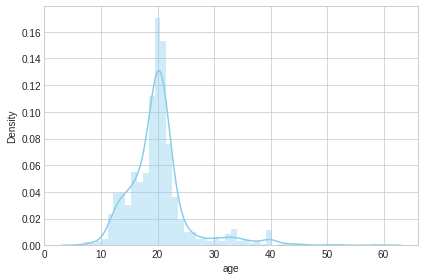

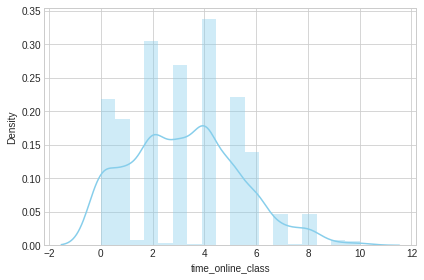

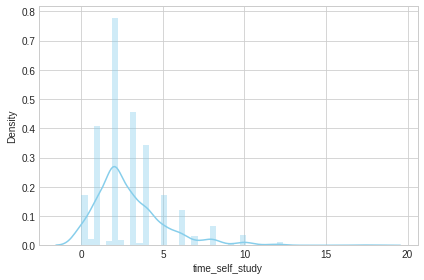

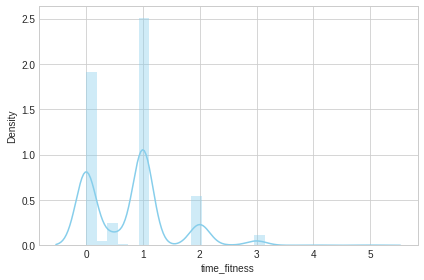

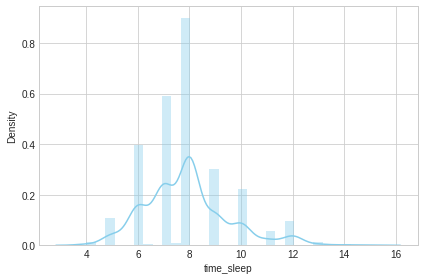

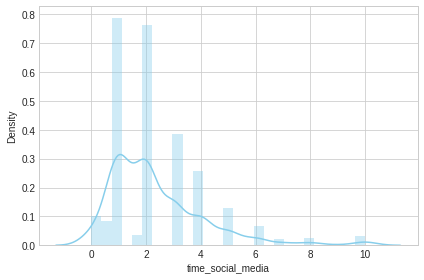

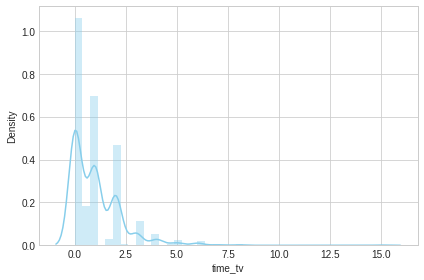

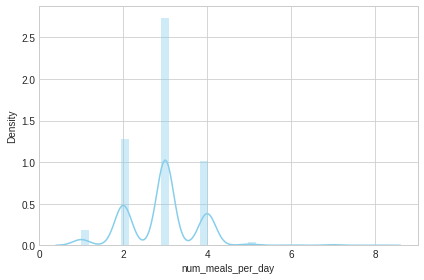

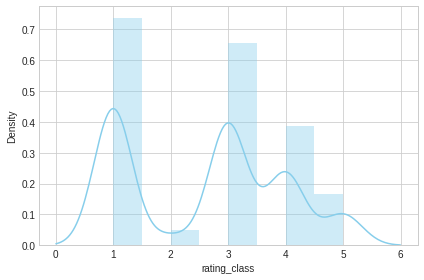

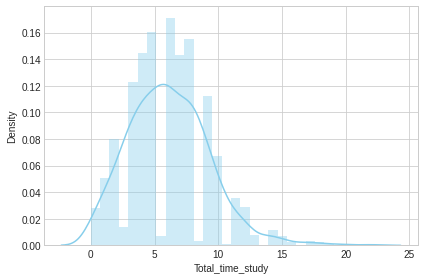

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(7,5))

features = numericals
for i in range(0, len(features)):
    plt.subplots(figsize=(6,4))
    sns.distplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()
    warnings.filterwarnings('ignore')

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='region', color='region',
                   width=900, height=570, title='Distribution of Region')

fig.show()

fig = px.histogram(df, x='rating_online_class', color='rating_online_class',
                   width=900, height=570, title='Distribution of Rating of Online Class')

fig.show()

fig = px.histogram(df, x='medium', color='medium',
                   width=900, height=570, title='Distribution of Mediums used for Stress Relief')

fig.show()

fig = px.histogram(df, x='prefered_social_media', color='prefered_social_media',
                   width=900, height=570, title='Distribution of Preferred Social Media')

fig.show()

fig = px.histogram(df, x='delta_weight', color='delta_weight',
                   width=900, height=570, title='Distribution of Delta Weight')

fig.show()

fig = px.histogram(df, x='health_issue_in_lockdown', color='health_issue_in_lockdown',
                   width=900, height=570, title='Distribution of Health Issues during Lockdown')

fig.show()

fig = px.histogram(df, x='stress_busters', color='stress_busters',
                   width=900, height=570, title='Distribution of Stress Busters')

fig.show()

fig = px.histogram(df, x='time_utilized', color='time_utilized',
                   width=900, height=570, title='Distribution of Time Utilized during Lockdown')

fig.show()

fig = px.histogram(df, x='more_family_connected', color='more_family_connected',
                   width=900, height=570, title='Distribution of Feeling More Connected with Family during Lockdown')

fig.show()

fig = px.histogram(df, x='miss_most', color='miss_most',
                   width=900, height=570, title='Distribution of Things Missed the Most during Lockdown')

fig.show()


#### Age distribution

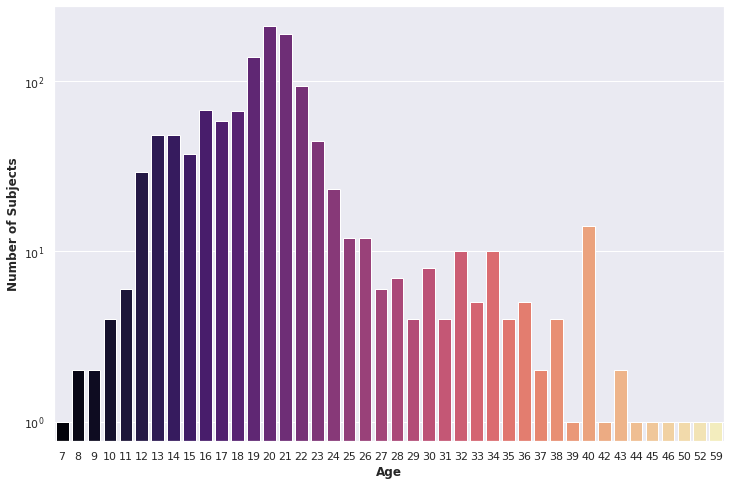

In [ ]:
plt.figure(figsize=(12, 8))
sns.set(style='darkgrid')
sns.countplot(x='age', data=df, palette='magma')
plt.yscale('log')
plt.xlabel('Age', weight='bold')
plt.ylabel('Number of Subjects', weight='bold')
plt.show()

In [ ]:
import plotly.express as px

# Urutkan rating dari yang terendah ke yang tertinggi
df_sorted = df.sort_values('level_school')

# Tentukan urutan kategori rating yang diinginkan
category_order = ['ES', 'JHS', 'SHS', 'College']

# Buat histogram
fig = px.histogram(df_sorted, x='level_school', color='level_school',
                   category_orders={'level_school': category_order},
                   width=700, height=480)

fig.update_layout(title='Distribution of age based on level school',
                  xaxis_title='Level school',
                  yaxis_title='No. of students',
                  font=dict(family='Droid Serif', size=15))

fig.show()

#### Distribusi region

In [ ]:
df["region"].value_counts()

DELHI-NCR            720
OUTSIDE DELHI-NCR    459
Name: region, dtype: int64

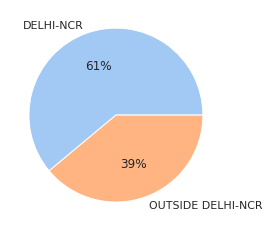

In [ ]:
#define data
data = df['region'].value_counts()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = data.index, colors = colors, autopct='%.0f%%')
plt.show()

Intepretation:

Berdasarkan distribusi region didapatkan responden pada DELHI-NCR sebanyak 61% dan Outside Delhi NCR sebesar 39%

#### Distribusi rating online class

In [ ]:
df["rating_online_class"].value_counts()

VERY POOR    435
AVERAGE      387
GOOD         229
EXCELLENT     98
POOR          30
Name: rating_online_class, dtype: int64

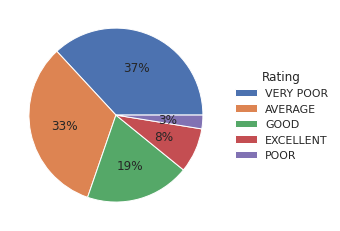

In [ ]:
# menghitung jumlah data pada setiap nilai rating
data = df['rating_online_class'].value_counts()

# menentukan warna yang akan digunakan pada pie chart
colors = sns.color_palette('deep')[0:5]

# membuat pie chart
plt.pie(data, colors = colors, autopct='%.0f%%')

# menambahkan legenda di luar pie chart
plt.legend(title='Rating', loc='center left', bbox_to_anchor=(1, 0.5), labels=data.index)

# menampilkan pie chart
plt.show()

In [ ]:
import plotly.express as px

# Urutkan rating dari yang terendah ke yang tertinggi
df_sorted = df.sort_values('rating_online_class')

# Tentukan urutan kategori rating yang diinginkan
category_order = ['VERY POOR', 'POOR', 'AVERAGE', 'GOOD', 'EXCELLENT']

# Buat histogram
fig = px.histogram(df_sorted, x='rating_online_class', color='rating_online_class',
                   category_orders={'rating_online_class': category_order},
                   width=700, height=480)

fig.update_layout(title='Ratings for online class',
                  xaxis_title='Ratings',
                  yaxis_title='No. of students',
                  font=dict(family='Droid Serif', size=15))

fig.show()

Berdasarkan data yang diberikan, terdapat lima kategori rating kelas online, yaitu Very Poor, Poor, Average, Good, dan Excellent. Jumlah responden yang memberikan rating pada kelas online adalah 1,179.

Dari data tersebut, ditemukan bahwa:

- Terdapat 435 responden (36,9%) yang memberikan rating Very Poor pada kelas online.
- Terdapat 30 responden (2,5%) yang memberikan rating Poor pada kelas online.
- Terdapat 387 responden (32,8%) yang memberikan rating Average pada kelas online.
- Terdapat 229 responden (19,4%) yang memberikan rating Good pada kelas online.
- Terdapat 98 responden (8,3%) yang memberikan rating Excellent pada kelas online.

Berdasarkan data di atas, dapat disimpulkan bahwa mayoritas responden memberikan rating yang kurang pada kelas online. Rating Very Poor dan Poor memiliki jumlah yang signifikan dibandingkan dengan rating lainnya. Oleh karena itu, perlu dilakukan evaluasi dan perbaikan pada kelas online agar kualitasnya dapat meningkat dan dapat memenuhi kebutuhan responden.

#### Sosial media yang paling banyak digunakan

Popular Social Media platforms:

In [ ]:
# Hitung jumlah pengguna untuk setiap social media dan urutkan secara menurun
social_media_counts = df['prefered_social_media'].value_counts().sort_values(ascending=False)
social_media_counts

INSTAGRAM    350
WHATSAPP     337
YOUTUBE      313
LINKEDIN      61
FACEBOOK      52
TWITTER       28
NONE          18
SNAPCHAT       8
REDDIT         5
TELEGRAM       3
OMEGLE         1
ELYMENT        1
QUORA          1
TALKLIFE       1
Name: prefered_social_media, dtype: int64

In [ ]:
# Ambil urutan social media yang sudah diurutkan
category_order = social_media_counts.index.tolist()

# Buat histogram dan gunakan urutan social media yang sudah diurutkan
fig = px.histogram(df, y='prefered_social_media', color='prefered_social_media',
                   category_orders={'prefered_social_media': category_order},
                   width=700, height=480)

fig.update_layout(title='Preferred Social Medias',
                  xaxis_title='Total users',
                  yaxis_title='Social medias',
                  font=dict(family='Balto', size=15))
fig.show()

In [ ]:
# Ambil urutan social media yang sudah diurutkan
category_order = social_media_counts.index.tolist()

# Buat histogram dan gunakan urutan social media yang sudah diurutkan
fig = px.histogram(df, y='prefered_social_media', color='prefered_social_media',
                   facet_col='level_school',  # tambahkan parameter facet_col untuk membedakan atara level_school
                   category_orders={'prefered_social_media': category_order},
                   width=850, height=470)

fig.update_layout(title='Preferred Social Medias',
                  xaxis_title='Total users',
                  yaxis_title='Social medias',
                  font=dict(family='Balto', size=15))
fig.show()


Top 5 Social Media

In [ ]:
# Ambil urutan social media 5 teratas
top_5_social_media = social_media_counts.head(5).index.tolist()

# Filter DataFrame dengan social media 5 teratas
df_top_5_social_media = df[df['prefered_social_media'].isin(top_5_social_media)]

# Buat histogram dan gunakan urutan social media yang sudah diurutkan
fig = px.histogram(df_top_5_social_media, y='prefered_social_media', color='prefered_social_media',
                   category_orders={'prefered_social_media': top_5_social_media},
                   width=700, height=480)

fig.update_layout(title='Preferred Social Medias',
                  xaxis_title='Total users',
                  yaxis_title='Social medias',
                  font=dict(family='Balto', size=15))
fig.show()


In [ ]:
# Ambil urutan social media 5 teratas
top_5_social_media = social_media_counts.head(5).index.tolist()

# Filter DataFrame dengan social media 5 teratas
df_top_5_social_media = df[df['prefered_social_media'].isin(top_5_social_media)]

# Buat histogram dan gunakan urutan social media yang sudah diurutkan dan tambahkan hue dari kolom level_school
fig = px.histogram(df_top_5_social_media, y='prefered_social_media', color='prefered_social_media',
                   category_orders={'prefered_social_media': top_5_social_media},
                   facet_col='level_school', facet_col_wrap=2,
                   width=700, height=480)

fig.update_layout(title='Preferred Social Medias',
                  xaxis_title='Total users',
                  yaxis_title='Social medias',
                  font=dict(family='Balto', size=15))

fig.show()

In [ ]:
df['prefered_social_media'].value_counts()

INSTAGRAM    350
WHATSAPP     337
YOUTUBE      313
LINKEDIN      61
FACEBOOK      52
TWITTER       28
NONE          18
SNAPCHAT       8
REDDIT         5
TELEGRAM       3
OMEGLE         1
ELYMENT        1
QUORA          1
TALKLIFE       1
Name: prefered_social_media, dtype: int64

In [ ]:
selected_social_media = ['INSTAGRAM', 'WHATSAPP', 'YOUTUBE', 'LINKEDIN', 'FACEBOOK']

df_filtered_socmed = df.groupby(['level_school', 'prefered_social_media'])['level_school'].count().unstack()[selected_social_media]

print(df_filtered_socmed)

prefered_social_media  INSTAGRAM  WHATSAPP  YOUTUBE  LINKEDIN  FACEBOOK
level_school                                                           
College                    270.0     216.0    182.0      58.0      38.0
ES                           2.0      16.0     22.0       NaN       NaN
JHS                         20.0      50.0     51.0       NaN       5.0
SHS                         58.0      55.0     58.0       3.0       9.0


#### Apakah student menggunakan waktunya lebih banyak dengan sosial media?

In [ ]:
df["is_social_media_more?"].value_counts()

NO     801
YES    378
Name: is_social_media_more?, dtype: int64

#### Apakah student memiliki waktu tidur yang normal?

In [ ]:
df["normal_sleep?"].value_counts()

YES    788
NO     391
Name: normal_sleep?, dtype: int64

#### Health Issues

In [ ]:
df['health_issue_in_lockdown'].value_counts()

NO     1018
YES     161
Name: health_issue_in_lockdown, dtype: int64

#### Time spend self study

In [ ]:
fig = px.histogram(df, x = 'time_self_study',
                   color_discrete_sequence=['darkorange'],
                   width=900, height = 550)

fig.update_layout(title = 'Time spent on self study',
                 xaxis_title = 'Hours',
                 yaxis_title = 'Number of students',
                 font = dict(family = 'Balto', size = 13))
fig.show()

In [ ]:
fig = px.scatter(df, x = 'age', y = 'time_self_study', size = 'time_self_study', color='time_self_study')
fig.update_layout(title = 'Time spend self study',
                 xaxis_title = 'students of age',
                 yaxis_title = 'Time spent',
                 font = dict(family = 'Droid Serif', size = 14))
fig.show()

#### Time spend on social media

In [ ]:
fig = px.scatter(df, x = 'age', y = 'time_social_media', size = 'time_social_media', color='prefered_social_media')
fig.update_layout(title = 'Time spend on social medias',
                 xaxis_title = 'students of age',
                 yaxis_title = 'Time spent',
                 font = dict(family = 'Droid Serif', size = 14))
fig.show()

#### More Connected with their Family/ Close Friends?

In [ ]:
import plotly.graph_objects as go
from plotly import tools

labels, values = df['more_family_connected'].unique(), df['more_family_connected'].value_counts()

fig = go.Figure(data=[go.Pie(labels = labels, values = values, pull=[0.1])])
fig.update_layout(title = 'Do You Feel more Connected to Family/Close Friends ?',
                 font = dict(family = 'Droid Serif', size = 15))
fig.show()

#### Utilize their time

In [ ]:
labels, values = df['time_utilized'].unique(), df['time_utilized'].value_counts()


fig = go.Figure(data = [go.Pie(labels = labels, values = values.sort_values(), hole = .3)])
fig.update_layout(title = 'Time Utilize',
                 font = dict(family = 'Droid Serif', size = 15))
fig.show()

#### Most missing

In [ ]:
print(df['miss_most'].unique())

['SCHOOL/COLLEGE' 'PASSING TIME OUTSIDE' 'TRAVELLING'
 'FRIENDS/RELATIVES/FAMILY' 'EATING OUTSIDE' 'COLLEAGUES' 'NOTHING' 'ALL']


In [ ]:
import plotly.express as px

pct = df['miss_most'].value_counts() * 100 / df['miss_most'].value_counts().sum()

fig = px.histogram(df, x=pct, y=pct.index, color=pct.index,
                   width=900, height=570)

fig.update_layout(title='What students are missing during covid-19',
                  xaxis_title='Percentage',
                  yaxis_title='Features',
                  font=dict(family='Droid Serif', size=15))

# Tambahkan teks jumlah pada setiap bar
for i in range(len(pct)):
    fig.add_annotation(x=pct[i], y=pct.index[i],
                       text=str(pct[i].round(2))+'%',
                       showarrow=False,
                       font=dict(family='Arial', size=12),
                       xshift=10)

fig.show()

#### Effects of Pandemic on Student's weights:

In [ ]:
print(df['delta_weight'].unique())

['INCREASED' 'DECREASED' 'REMAIN CONSTANT']


In [ ]:
df['delta_weight'].value_counts()

REMAIN CONSTANT    534
INCREASED          438
DECREASED          207
Name: delta_weight, dtype: int64

In [ ]:
labels, values = ['Remain Constant','Increased','Decreased'], df['delta_weight'].value_counts()
fig = go.Figure(data=[go.Pie(labels =  labels, values = values, hole=.3)])
fig.update_layout(title = 'Effects on weights of students',
                 font = dict(family = 'Droid Serif', size = 14))
fig.show()

#### Student's favorite stress busters

In [ ]:
print(df['stress_busters'].unique())

['COOKING' 'SOCIAL MEDIA' 'MUSIC' 'INTERNET SURFING' 'MANY THINGS'
 'DOING EXTRA ACTIVITIES' 'ONLINE GAMING' 'TALKING' 'SLEEPING'
 'EXERCISE/GYM']


In [ ]:
df['stress_busters'].value_counts()

MUSIC                     282
DOING EXTRA ACTIVITIES    208
INTERNET SURFING          183
ONLINE GAMING             177
SLEEPING                  105
SOCIAL MEDIA               99
TALKING                    62
COOKING                    40
EXERCISE/GYM               13
MANY THINGS                10
Name: stress_busters, dtype: int64

In [ ]:
labels = df['stress_busters'].value_counts()

fig = px.histogram(df, x = labels, y = labels.index,
                   color = labels.index, width = 900, height = 570)

fig.update_layout(title = 'Stress busters of students',
                 xaxis_title = 'Count',
                 yaxis_title = 'Features',
                 font = dict(family = 'Droid Serif', size = 15))
fig.show()

#### What medium is used the most?

[Text(0, 0, 'LAPTOP/DESKTOP'),
 Text(1, 0, 'SMARTPHONE'),
 Text(2, 0, 'TABLET'),
 Text(3, 0, 'ANY GADGET')]

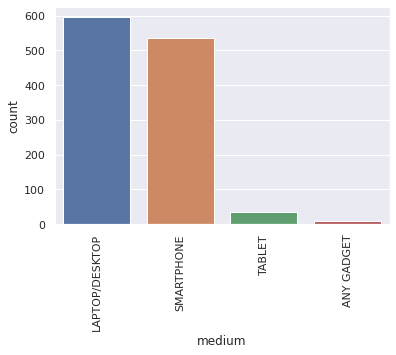

In [ ]:
count_plot = sns.countplot(x= 'medium', data= df)
count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=90)

In [ ]:
import plotly.express as px

labels = df['medium'].value_counts().sort_values(ascending=True)

fig = px.histogram(df, x=labels, y=labels.index, color=labels.index,
                   width=900, height=570)

fig.update_layout(title='Mediums used for stress relief',
                  xaxis_title='Count',
                  yaxis_title='Medium',
                  font=dict(family='Droid Serif', size=15))

fig.show()


In [ ]:
df["medium"].value_counts()

LAPTOP/DESKTOP    596
SMARTPHONE        537
TABLET             36
ANY GADGET         10
Name: medium, dtype: int64

In [ ]:
df.groupby('medium').time_online_class.mean()

medium
ANY GADGET        4.600000
LAPTOP/DESKTOP    3.244547
SMARTPHONE        3.067225
TABLET            4.361111
Name: time_online_class, dtype: float64

In [ ]:
df.groupby(['medium', 'rating_online_class'])['medium'].count().unstack()

rating_online_class,AVERAGE,EXCELLENT,GOOD,POOR,VERY POOR
medium,,,,,
ANY GADGET,2.0,2.0,4.0,1.0,1.0
LAPTOP/DESKTOP,209.0,45.0,117.0,11.0,214.0
SMARTPHONE,169.0,46.0,94.0,18.0,210.0
TABLET,7.0,5.0,14.0,NaN,10.0


### Multivariate

#### Correlation Matrix

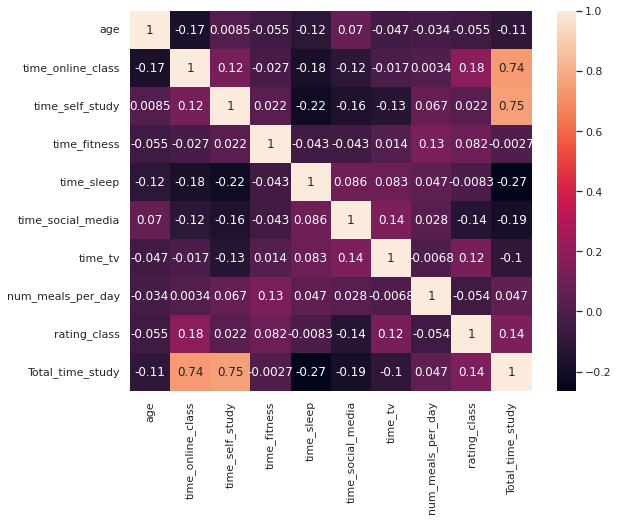

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,7))

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
results = df.corr()[ (df.corr() > 0.3) & (df.corr() != 1) ]
results

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day,rating_class,Total_time_study
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_online_class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.742667
time_self_study,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753473
time_fitness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_sleep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_social_media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_meals_per_day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating_class,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_time_study,NaN,0.742667,0.753473,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# sns.pairplot(df, hue='region')

#### "How do students rate their classes? Does time or medium influence their ratings?"

In [ ]:
df.columns

Index(['region', 'age', 'time_online_class', 'rating_online_class', 'medium',
       'time_self_study', 'time_fitness', 'time_sleep', 'time_social_media',
       'prefered_social_media', 'time_tv', 'num_meals_per_day', 'delta_weight',
       'health_issue_in_lockdown', 'stress_busters', 'time_utilized',
       'more_family_connected', 'miss_most', 'level_school', 'rating_class',
       'is_social_media_more?', 'normal_sleep?', 'Total_time_study'],
      dtype='object')

In [ ]:
df["rating_online_class"].value_counts()

VERY POOR    435
AVERAGE      387
GOOD         229
EXCELLENT     98
POOR          30
Name: rating_online_class, dtype: int64

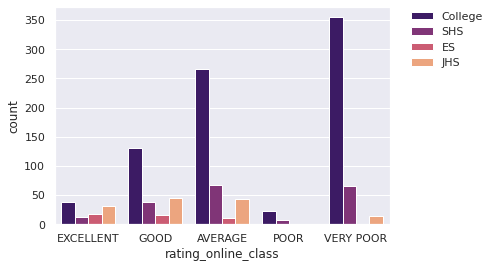

In [ ]:
# Ubah tipe data kolom 'level_school' menjadi kategori
# df['level_school'] = df['level_school'].astype('category')

# Urutkan nilai pada kolom 'rating_online_class'
rating_order = ['EXCELLENT', 'GOOD', 'AVERAGE', 'POOR','VERY POOR']

# Buat plot dengan urutan yang sudah diatur
sns.countplot(x='rating_online_class', data=df, hue='level_school', palette='magma', order=rating_order)

# Set legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
(pd.crosstab(df.level_school, df.rating_online_class, normalize= 'index') * 100).round(1)

rating_online_class,AVERAGE,EXCELLENT,GOOD,POOR,VERY POOR
level_school,,,,,
College,32.8,4.7,16.0,2.7,43.8
ES,22.7,38.6,36.4,0.0,2.3
JHS,32.3,23.3,33.8,0.0,10.5
SHS,35.6,6.3,19.9,4.2,34.0


Insight:

Dari hasil rating yang terlihat pada tabel tersebut, dapat dilihat bahwa siswa di sekolah dasar memberikan rating yang paling tinggi untuk kelas online dengan persentase 38.6% siswa memberikan rating excellent, 36.4% siswa memberikan rating good, dan 22.7% siswa memberikan rating average. Sementara itu, siswa di sekolah menengah atas memberikan rating paling rendah untuk kelas online, dengan hanya 6.3% siswa memberikan rating excellent, 19.9% siswa memberikan rating good, 35.6% siswa memberikan rating average, 4.2% siswa memberikan rating poor, dan 34.0% siswa memberikan rating very poor.

Dari hasil tersebut, dapat ditarik sebuah insight bahwa semakin tinggi jenjang sekolah, semakin sulit bagi siswa untuk menyesuaikan diri dengan pembelajaran online. Hal ini bisa jadi disebabkan oleh beberapa faktor, seperti kompleksitas materi yang semakin tinggi, kebutuhan interaksi fisik yang semakin meningkat, serta ketidakmampuan untuk memaksimalkan teknologi yang tersedia untuk pembelajaran online.

Apakah waktu dan medium mempengaruhi?

<Axes: xlabel='rating_online_class', ylabel='count'>

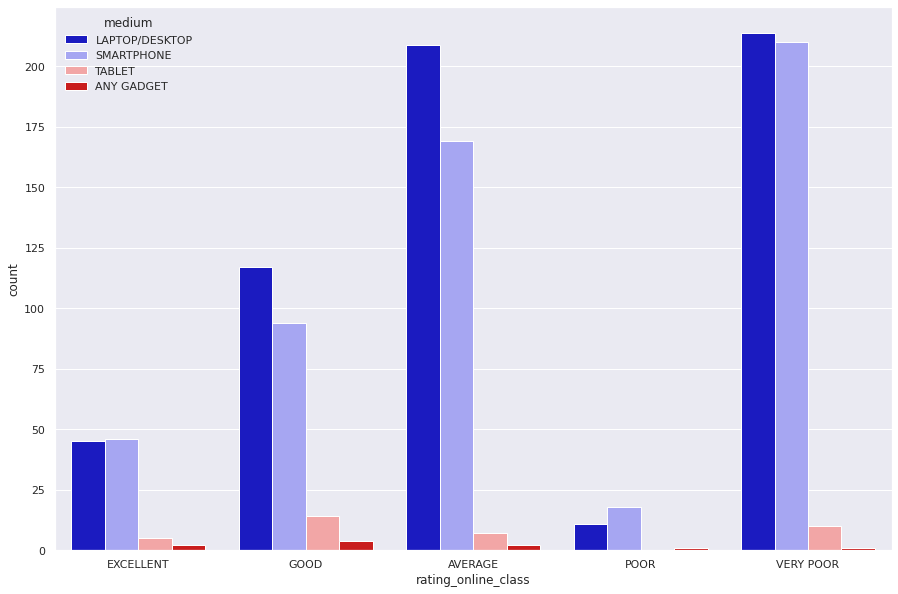

In [ ]:
plt.figure(figsize= (15,10))
# Urutkan nilai pada kolom 'rating_online_class'
rating_order = ['EXCELLENT', 'GOOD', 'AVERAGE', 'POOR','VERY POOR']

sns.countplot(x= 'rating_online_class', data= df, hue= 'medium', palette= 'seismic', order=rating_order)

In [ ]:
(pd.crosstab(df.medium, df.rating_online_class, normalize= 'index') * 100).round(1)

rating_online_class,AVERAGE,EXCELLENT,GOOD,POOR,VERY POOR
medium,,,,,
ANY GADGET,20.0,20.0,40.0,10.0,10.0
LAPTOP/DESKTOP,35.1,7.6,19.6,1.8,35.9
SMARTPHONE,31.5,8.6,17.5,3.4,39.1
TABLET,19.4,13.9,38.9,0.0,27.8


Tabel menunjukkan persentase rating online class berdasarkan gadget yang digunakan oleh siswa. Dapat dilihat bahwa penggunaan laptop atau desktop memiliki persentase rating yang lebih tinggi dibandingkan dengan gadget lainnya, dengan 19,6% rating "good" dan 7,6% rating "excellent". Hal ini mungkin disebabkan oleh ukuran layar yang lebih besar dan kemampuan untuk menjalankan aplikasi yang lebih kompleks pada laptop dan desktop, yang dapat meningkatkan pengalaman belajar online siswa.

Sedangkan, penggunaan tablet memiliki persentase rating tertinggi untuk kategori "good", yaitu sebesar 38,9%.

Namun, penggunaan smartphone memiliki rating paling rendah di semua kategori, dengan 39,1% rating "very poor" dan 3,4% rating "poor". Hal ini mungkin disebabkan oleh keterbatasan ukuran layar dan kemampuan perangkat smartphone yang terbatas dalam menjalankan aplikasi yang kompleks. Selain itu, penggunaan smartphone untuk belajar online dapat menyebabkan gangguan konsentrasi akibat notifikasi dari aplikasi lainnya.

Dalam keseluruhan, meskipun gadget yang digunakan berbeda, tabel 3 menunjukkan bahwa ada persentase yang signifikan dari siswa yang masih mengalami kesulitan dalam belajar online. Oleh karena itu, penting bagi institusi pendidikan untuk mengevaluasi dan memperbaiki infrastruktur teknologi mereka untuk memastikan bahwa siswa dapat mengakses dan menggunakan alat pembelajaran online dengan mudah dan efektif.

In [ ]:
df.groupby('level_school').rating_class.mean()

level_school
College    2.351418
ES         4.090909
JHS        3.593985
SHS        2.602094
Name: rating_class, dtype: float64

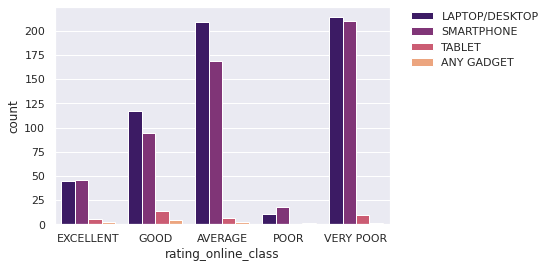

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# # Ubah tipe data kolom 'level_school' menjadi kategori
# df['level_school'] = df['level_school'].astype('category')

# Urutkan nilai pada kolom 'rating_online_class'
rating_order = ['EXCELLENT', 'GOOD', 'AVERAGE', 'POOR','VERY POOR']

# Buat plot dengan urutan yang sudah diatur
ax = sns.countplot(x= 'rating_online_class', data= df, hue= 'medium', palette= 'magma', order=rating_order)

# Set legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Tampilkan plot
plt.show()

In [ ]:
df.rating_online_class = pd.Categorical(df.rating_online_class, ['EXCELLENT', 'GOOD', 'AVERAGE', 'POOR','VERY POOR'], ordered= True)

In [ ]:
df.rating_online_class.value_counts()

VERY POOR    435
AVERAGE      387
GOOD         229
EXCELLENT     98
POOR          30
Name: rating_online_class, dtype: int64

In [ ]:
(pd.crosstab(df.rating_online_class, df.medium, normalize= 'index') * 100).round(1).loc[:, ['SMARTPHONE', 'LAPTOP/DESKTOP', 'TABLET', 'ANY GADGET']]

medium,SMARTPHONE,LAPTOP/DESKTOP,TABLET,ANY GADGET
rating_online_class,,,,
EXCELLENT,46.9,45.9,5.1,2.0
GOOD,41.0,51.1,6.1,1.7
AVERAGE,43.7,54.0,1.8,0.5
POOR,60.0,36.7,0.0,3.3
VERY POOR,48.3,49.2,2.3,0.2


In [ ]:
df.groupby('rating_online_class')['time_online_class'].mean().round(2)

rating_online_class
EXCELLENT    3.58
GOOD         3.55
AVERAGE      3.56
POOR         2.28
VERY POOR    2.70
Name: time_online_class, dtype: float64

Student yang memiliki lebih banyak kelas dan menggunakan desktop cenderung memberikan penilaian yang lebih baik mungkin karena lebih mudah untuk fokus, mencatat, dan duduk lebih lama saat menggunakan desktop yang mengarah pada pengalaman yang lebih baik - dibandingkan dengan smartphone.

Sekarang, jika ingin lebih memperdalam untuk memeriksa apakah durasi waktu benar-benar menjadi masalah atau tidak

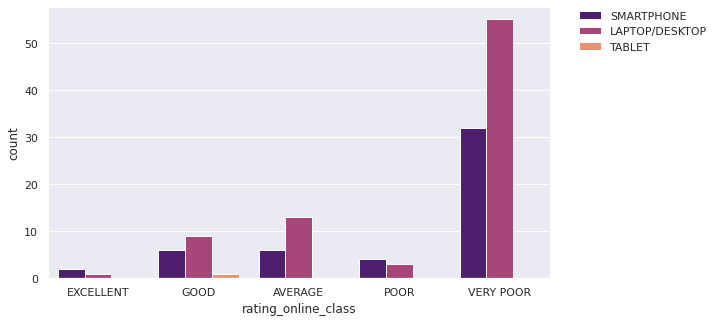

In [ ]:
tmp = df[df.time_online_class == 0.0]

plt.figure(figsize= (9,5))
sns.countplot(x= 'rating_online_class', data= tmp, hue= 'medium', palette= 'magma', order=rating_order)

# Set legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Dan yang mengejutkan, para siswa yang tidak menghabiskan waktu belajar sama sekali, lebih aktif dalam memberikan penilaian 'Buruk'.

In [ ]:
df.time_online_class.max()

10.0

In [ ]:
#Just adding classes of time
temp = pd.concat([df, pd.cut(df.time_online_class, 5).rename('time_class')], axis= 1)

In [ ]:
temp.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,...,stress_busters,time_utilized,more_family_connected,miss_most,level_school,rating_class,is_social_media_more?,normal_sleep?,Total_time_study,time_class
0,DELHI-NCR,21,2.0,GOOD,LAPTOP/DESKTOP,4.0,0.0,7.0,3.0,LINKEDIN,...,COOKING,YES,YES,SCHOOL/COLLEGE,College,4.0,NO,YES,6.0,"(-0.01, 2.0]"
1,DELHI-NCR,21,0.0,EXCELLENT,SMARTPHONE,0.0,2.0,10.0,3.0,YOUTUBE,...,SOCIAL MEDIA,YES,NO,PASSING TIME OUTSIDE,College,5.0,YES,YES,0.0,"(-0.01, 2.0]"
2,DELHI-NCR,20,7.0,VERY POOR,LAPTOP/DESKTOP,3.0,0.0,6.0,2.0,LINKEDIN,...,MUSIC,NO,YES,TRAVELLING,College,1.0,NO,NO,10.0,"(6.0, 8.0]"
3,DELHI-NCR,20,3.0,VERY POOR,SMARTPHONE,2.0,1.0,6.0,5.0,INSTAGRAM,...,INTERNET SURFING,NO,NO,FRIENDS/RELATIVES/FAMILY,College,1.0,YES,NO,5.0,"(2.0, 4.0]"
4,DELHI-NCR,21,3.0,GOOD,LAPTOP/DESKTOP,3.0,1.0,8.0,3.0,INSTAGRAM,...,SOCIAL MEDIA,NO,NO,TRAVELLING,College,4.0,NO,YES,6.0,"(2.0, 4.0]"


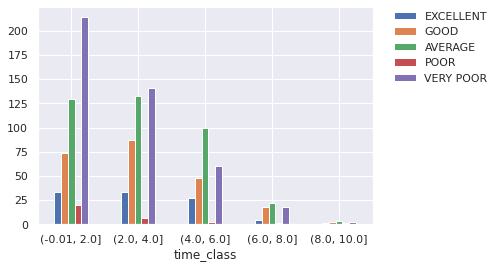

In [ ]:
pd.crosstab(temp.time_class, temp.rating_online_class).plot(kind= 'bar')
plt.xticks(rotation= 'horizontal');

# Set legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Faktanya, siswa yang tidak belajar atau hanya belajar selama 2 jam atau kurang cenderung memberikan umpan balik negatif, seiring meningkatnya waktu belajar mereka, kualitas umpan balik juga meningkat, namun tidak memberikan penilaian 'Sangat Baik' pada mode pembelajaran manapun.

#### The effect on rating, what is affecting - Students whose class time is better or those who are more active on social media?

In [ ]:
temp = pd.concat([temp, pd.cut(df.time_social_media, 5).rename('time_social')], axis=1)
temp.sample(5)

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,...,time_utilized,more_family_connected,miss_most,level_school,rating_class,is_social_media_more?,normal_sleep?,Total_time_study,time_class,time_social
230,OUTSIDE DELHI-NCR,17,6.0,VERY POOR,ANY GADGET,4.0,2.5,8.0,0.5,INSTAGRAM,...,YES,YES,SCHOOL/COLLEGE,SHS,1.0,NO,YES,10.0,"(4.0, 6.0]","(-0.01, 2.0]"
774,OUTSIDE DELHI-NCR,21,5.0,AVERAGE,LAPTOP/DESKTOP,1.0,1.0,8.0,2.0,INSTAGRAM,...,YES,YES,FRIENDS/RELATIVES/FAMILY,College,3.0,YES,YES,6.0,"(4.0, 6.0]","(-0.01, 2.0]"
815,OUTSIDE DELHI-NCR,21,0.0,VERY POOR,SMARTPHONE,2.0,3.0,9.0,1.0,WHATSAPP,...,NO,NO,PASSING TIME OUTSIDE,College,1.0,NO,YES,2.0,"(-0.01, 2.0]","(-0.01, 2.0]"
406,DELHI-NCR,27,3.0,EXCELLENT,LAPTOP/DESKTOP,2.0,2.0,7.0,1.0,INSTAGRAM,...,YES,YES,TRAVELLING,College,5.0,NO,YES,5.0,"(2.0, 4.0]","(-0.01, 2.0]"
116,OUTSIDE DELHI-NCR,14,3.0,GOOD,SMARTPHONE,5.0,1.0,12.0,0.3,INSTAGRAM,...,YES,YES,COLLEAGUES,JHS,4.0,NO,NO,8.0,"(2.0, 4.0]","(-0.01, 2.0]"


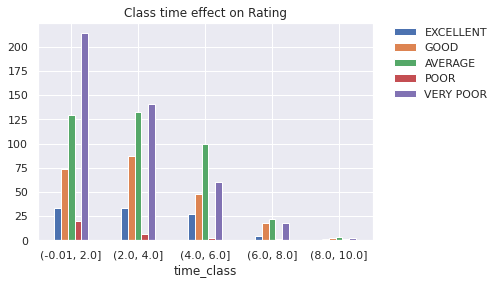

In [ ]:
pd.crosstab(temp.time_class, temp.rating_online_class).plot(kind= 'bar')
plt.title("Class time effect on Rating")
plt.xticks(rotation= 'horizontal');

# Set legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

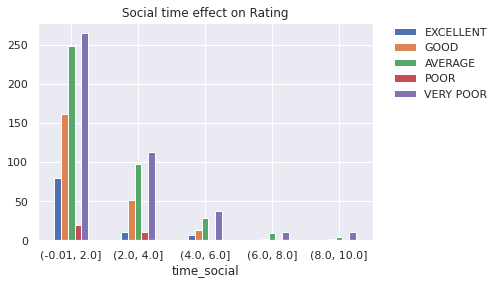

In [ ]:
pd.crosstab(temp.time_social, temp.rating_online_class).plot(kind= 'bar')
plt.title("Social time effect on Rating")
plt.xticks(rotation= 'horizontal');

# Set legend di luar plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Di sini kita melihat bahwa, orang-orang yang `kurang aktif di media sosial`, memberikan ulasan campuran tetapi secara umum, `review rata-rata dan bagus juga datang dari mereka`, jadi itu artinya, mayoritas siswa yang menikmati kelas yaitu memberikan ulasan Rata-Rata atau Bagus, menghabiskan lebih sedikit waktu di media sosial dan mayoritas suara untuk penilaian berasal dari mereka. Mereka cenderung menilai lebih.

**Di sisi lain**, <u> semakin banyak siswa, yang belajar mereka memberikan ulasan yang lebih baik. </u> <br>
Dan hal lain yang perlu diperhatikan di sini adalah, orang-orang yang memberikan lebih banyak waktu - baik dalam sosial maupun belajar lebih sedikit dibandingkan dengan mereka yang menghabiskan lebih sedikit waktu di kedua sisi.

Kesimpulannya adalah - Belajar lebih banyak, Kurangi bersosialisasi, jadilah produktif.
____

## Handling Outlier

In [ ]:
# divide the column names based on their types
num = df[["age",	"time_online_class",	"time_self_study",	"time_fitness",	"time_sleep",	"time_social_media",	"time_tv",	"num_meals_per_day"]]
# num = df.select_dtypes(include=['int64','float64'])
cat_df = df.select_dtypes(include=['object'])

# print(f"numericals columns are {num}")
# print(f"categoricals columns are {cat_df}")

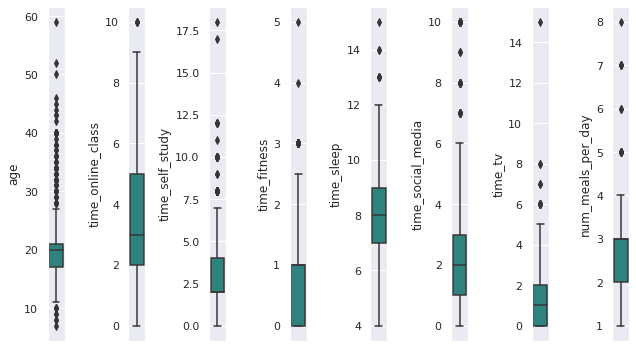

In [ ]:
# Menampilkan outlier pada kolom numericals
plt.figure(figsize=(9,5))
# select numerical columns
# num = df.select_dtypes(include=['int64','float64'])
num = df[["age",	"time_online_class",	"time_self_study",	"time_fitness",	"time_sleep",	"time_social_media",	"time_tv",	"num_meals_per_day"]]

# plotting
features = list(num.columns)
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=num[features[i]], palette= 'viridis')
    plt.tight_layout()

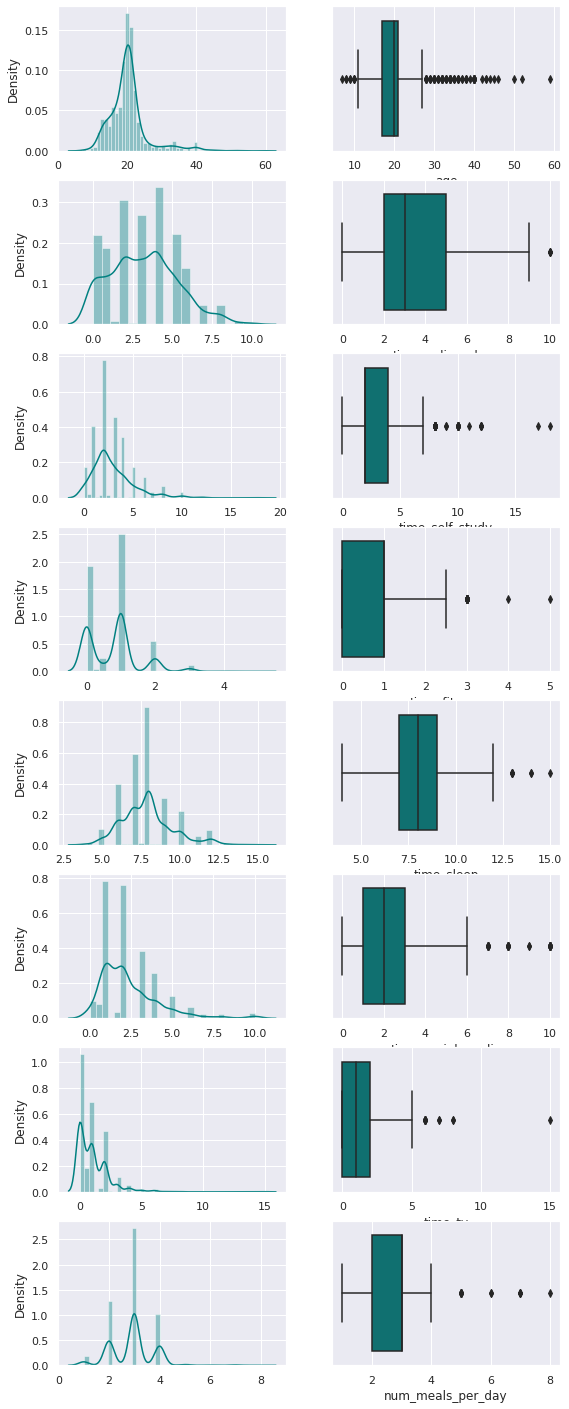

In [ ]:
# Menampilkan outlier dengan melihat persebaran datanya
features = list(num.columns)
fig, ax = plt.subplots(len(features),2,figsize=(9,25))
for idx, column in enumerate(features):
    sns.distplot(
        x=num[column],
        color='teal',
        ax=ax[idx][0])
    sns.boxplot(
        x=num[column],
        color='teal',
        ax=ax[idx][1]
        )

In [ ]:
fig = px.histogram(df, x = 'age', marginal = 'box',
                   width = 900, height = 580, color_discrete_sequence=['teal'],)
fig.update_layout(title = 'Age distribution',
                  xaxis_title = 'Age groups',
                  yaxis_title = 'Number of students',
                  font = dict(family = 'Arial', size = 15),
                  bargap = 0.1)
fig.show();

In [ ]:
fig = px.histogram(df, x = 'time_self_study', marginal = 'box',
                   width = 900, height = 580, color_discrete_sequence=['teal'],)
fig.update_layout(title = 'Time self study distribution',
                  xaxis_title = 'Hours',
                  yaxis_title = 'Number of students',
                  font = dict(family = 'Arial', size = 15),
                  bargap = 0.1)
fig.show();

In [ ]:
# Handling menggunakan IQR pada value yang dianggap outlier

# Q1 = df["age"].quantile(0.25)
# Q3 = df["age"].quantile(0.75)
# IQR = Q3 - Q1
# low_limit = Q1 - (IQR * 1.5)
# high_limit = Q3 + (IQR * 1.5)
# df = df[(df["age"] >= low_limit) &
#                          (df["age"] <= high_limit)
#                          ]

Q1_age = df["age"].quantile(0.25)
Q3_age = df["age"].quantile(0.75)
IQR_age = Q3_age - Q1_age
low_limit_age = Q1_age - (IQR_age * 1.5)
high_limit_age = Q3_age + (IQR_age * 1.5)

Q1_time = df["time_self_study"].quantile(0.25)
Q3_time = df["time_self_study"].quantile(0.75)
IQR_time = Q3_time - Q1_time
low_limit_time = Q1_time - (IQR_time * 1.5)
high_limit_time = Q3_time + (IQR_time * 1.5)

df = df[(df["age"] >= low_limit_age) &
        (df["age"] <= high_limit_age) &
        (df["time_self_study"] >= low_limit_time) &
        (df["time_self_study"] <= high_limit_time)]


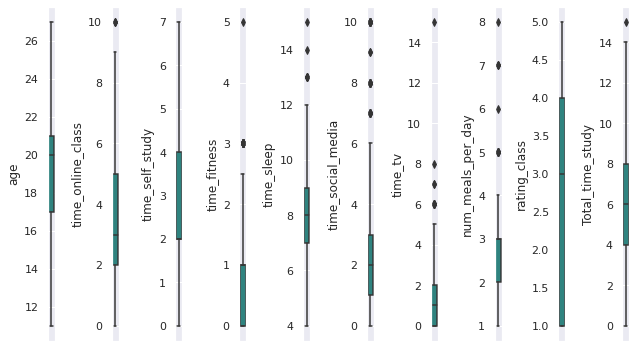

In [ ]:
# Menampilkan outlier pada kolom numericals
plt.figure(figsize=(9,5))
# select numerical columns
num = df.select_dtypes(include=['int64','float64'])
# plotting
features = list(num.columns)
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=num[features[i]], palette= 'viridis')
    plt.tight_layout()

In [ ]:
num.describe()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day,rating_class,Total_time_study
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,19.000000,3.227524,2.621845,0.766845,7.961456,2.439854,1.027670,2.924272,2.540777,5.849369
std,3.163814,2.104857,1.596564,0.734282,1.617013,1.793093,1.276561,0.833047,1.363764,2.842033
min,11.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,17.000000,2.000000,2.000000,0.000000,7.000000,1.000000,0.000000,2.000000,1.000000,4.000000
50%,20.000000,3.000000,2.000000,1.000000,8.000000,2.000000,1.000000,3.000000,3.000000,6.000000
75%,21.000000,5.000000,4.000000,1.000000,9.000000,3.000000,2.000000,3.000000,4.000000,8.000000
max,27.000000,10.000000,7.000000,5.000000,15.000000,10.000000,15.000000,8.000000,5.000000,15.000000


## Supervised Classification


### Heatmap Corr

<Axes: >

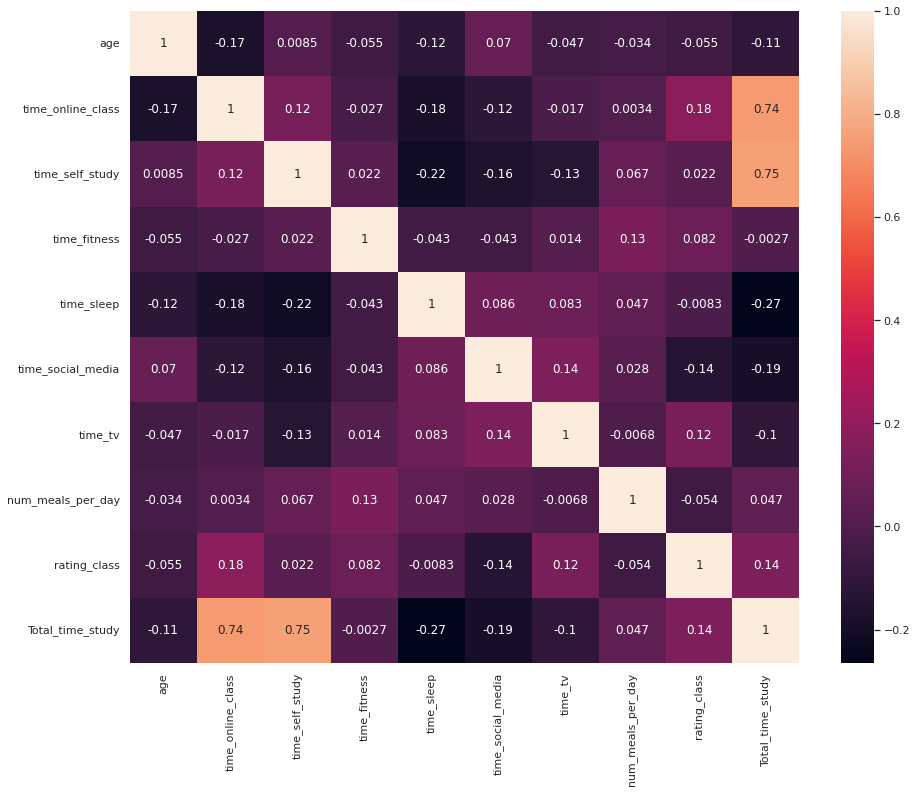

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df_class.corr(), annot = True)

Feature time_online_class dan time_self_study memiliki korelasi yang tinggi dengan feature Total_time_study, hal tersebut dikarenakan feature Total_time_study merupakan hasil feature engineering dengan penjumlahan value antara time_online_class dan time_self_study, sehingga feature total_time_study tidak akan digunakan.

In [ ]:
df_class.head()

,region,age,time_online_class,rating_online_class,medium,time_self_study,time_fitness,time_sleep,time_social_media,prefered_social_media,...,health_issue_in_lockdown,stress_busters,time_utilized,more_family_connected,miss_most,level_school,rating_class,is_social_media_more?,normal_sleep?,Total_time_study
0,DELHI-NCR,21,2.0,GOOD,LAPTOP/DESKTOP,4.0,0.0,7.0,3.0,LINKEDIN,...,NO,COOKING,YES,YES,SCHOOL/COLLEGE,College,4.0,NO,YES,6.0
1,DELHI-NCR,21,0.0,EXCELLENT,SMARTPHONE,0.0,2.0,10.0,3.0,YOUTUBE,...,NO,SOCIAL MEDIA,YES,NO,PASSING TIME OUTSIDE,College,5.0,YES,YES,0.0
2,DELHI-NCR,20,7.0,VERY POOR,LAPTOP/DESKTOP,3.0,0.0,6.0,2.0,LINKEDIN,...,NO,MUSIC,NO,YES,TRAVELLING,College,1.0,NO,NO,10.0
3,DELHI-NCR,20,3.0,VERY POOR,SMARTPHONE,2.0,1.0,6.0,5.0,INSTAGRAM,...,NO,INTERNET SURFING,NO,NO,FRIENDS/RELATIVES/FAMILY,College,1.0,YES,NO,5.0
4,DELHI-NCR,21,3.0,GOOD,LAPTOP/DESKTOP,3.0,1.0,8.0,3.0,INSTAGRAM,...,NO,SOCIAL MEDIA,NO,NO,TRAVELLING,College,4.0,NO,YES,6.0


In [ ]:
df_class.columns

Index(['region', 'age', 'time_online_class', 'rating_online_class', 'medium',
       'time_self_study', 'time_fitness', 'time_sleep', 'time_social_media',
       'prefered_social_media', 'time_tv', 'num_meals_per_day', 'delta_weight',
       'health_issue_in_lockdown', 'stress_busters', 'time_utilized',
       'more_family_connected', 'miss_most', 'level_school', 'rating_class',
       'is_social_media_more?', 'normal_sleep?', 'Total_time_study'],
      dtype='object')

In [ ]:
model_data = df_class[["age","time_online_class","time_self_study", "time_fitness", "time_sleep", "time_social_media", "time_tv", "num_meals_per_day", "delta_weight", "health_issue_in_lockdown"]]
model_data.head()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown
0,21,2.0,4.0,0.0,7.0,3.0,1.0,4,INCREASED,NO
1,21,0.0,0.0,2.0,10.0,3.0,0.0,3,DECREASED,NO
2,20,7.0,3.0,0.0,6.0,2.0,0.0,3,REMAIN CONSTANT,NO
3,20,3.0,2.0,1.0,6.0,5.0,0.0,3,DECREASED,NO
4,21,3.0,3.0,1.0,8.0,3.0,1.0,4,REMAIN CONSTANT,NO


### Encoding

Binary encoding

In [ ]:
binary_columns = ['health_issue_in_lockdown']

le = LabelEncoder()
for column in binary_columns:
    model_data[column] = le.fit_transform(model_data[column])

One Hot

In [ ]:
delta_weight_encoded = pd.get_dummies(model_data['delta_weight'], prefix='delta_weight')

# Gabungkan dataframe hasil encoding dengan dataframe asli menggunakan pd.concat
model_data = pd.concat([model_data, delta_weight_encoded], axis=1)

In [ ]:
data_encoded = model_data
data_encoded.head()

,age,time_online_class,time_self_study,time_fitness,time_sleep,time_social_media,time_tv,num_meals_per_day,delta_weight,health_issue_in_lockdown,delta_weight_DECREASED,delta_weight_INCREASED,delta_weight_REMAIN CONSTANT
0,21,2.0,4.0,0.0,7.0,3.0,1.0,4,INCREASED,0,0,1,0
1,21,0.0,0.0,2.0,10.0,3.0,0.0,3,DECREASED,0,1,0,0
2,20,7.0,3.0,0.0,6.0,2.0,0.0,3,REMAIN CONSTANT,0,0,0,1
3,20,3.0,2.0,1.0,6.0,5.0,0.0,3,DECREASED,0,1,0,0
4,21,3.0,3.0,1.0,8.0,3.0,1.0,4,REMAIN CONSTANT,0,0,0,1


In [ ]:
data_encoded.columns

Index(['age', 'time_online_class', 'time_self_study', 'time_fitness',
       'time_sleep', 'time_social_media', 'time_tv', 'num_meals_per_day',
       'delta_weight', 'health_issue_in_lockdown', 'delta_weight_DECREASED',
       'delta_weight_INCREASED', 'delta_weight_REMAIN CONSTANT'],
      dtype='object')

### Filltering features

In [ ]:
X=data_encoded[['age', 'time_online_class', 'time_self_study', 'time_fitness',
       'time_sleep', 'time_social_media', 'time_tv', 'num_meals_per_day', 'delta_weight_DECREASED',
       'delta_weight_INCREASED', 'delta_weight_REMAIN CONSTANT']]
y=data_encoded['health_issue_in_lockdown']

### Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X[:5]

### Splitting data


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    702
1    123
Name: health_issue_in_lockdown, dtype: int64
0    316
1     38
Name: health_issue_in_lockdown, dtype: int64


### Baseline Modeling

In [ ]:
# RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(X_train, y_train)
pred_RF = RF.predict(X_test)

# DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
pred_DT = dt.predict(X_test)

# LogisticRegression
logr = linear_model.LogisticRegression()
logr.fit(X_train,y_train)
pred_logr = logr.predict(X_test)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pred_xgb = xgb.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
pred_gb = gb.predict(X_test)

# LGBM
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
pred_lgbm = lgbm.predict(X_test)

# ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
pred_etc = etc.predict(X_test)

# HistGradientBoostingClasifier
hgbc = HistGradientBoostingClassifier(random_state=42)
hgbc.fit(X_train,y_train)
pred_hgbc = hgbc.predict(X_test)

#### Evaluation

In [ ]:
models = pd.DataFrame({
    'Model' : ['RandomForestClassifier',
               'DecisionTreeClassifier',
               'LogisticRegression',
               'XGBClassifier',
               'GradientBoostingClassifier',
               'LGBMClassifier',
               'ExtraTreesClassifier',
               'HistGradientBoostingClassifier'],
    'Recall' : [recall_score(y_test, pred_RF),
             recall_score(y_test, pred_DT),
             recall_score(y_test, pred_logr),
             recall_score(y_test, pred_xgb),
             recall_score(y_test, pred_gb),
             recall_score(y_test, pred_lgbm),
             recall_score(y_test, pred_etc),
             recall_score(y_test, pred_hgbc)],
    'AUC' : [roc_auc_score(y_test, pred_RF),
             roc_auc_score(y_test, pred_DT),
             roc_auc_score(y_test, pred_logr),
             roc_auc_score(y_test, pred_xgb),
             roc_auc_score(y_test, pred_gb),
             roc_auc_score(y_test, pred_lgbm),
             roc_auc_score(y_test, pred_etc),
             roc_auc_score(y_test, pred_hgbc)],
    'F1 Score':[f1_score(y_test, pred_RF),
                f1_score(y_test, pred_DT),
                f1_score(y_test, pred_logr),
                f1_score(y_test, pred_xgb),
                f1_score(y_test, pred_gb),
                f1_score(y_test, pred_lgbm),
                f1_score(y_test, pred_etc),
                f1_score(y_test, pred_hgbc)],
    'precision':[precision_score(y_test, pred_RF),
                precision_score(y_test, pred_DT),
                precision_score(y_test, pred_logr),
                precision_score(y_test, pred_xgb),
                precision_score(y_test, pred_gb),
                precision_score(y_test, pred_lgbm),
                precision_score(y_test, pred_etc),
                precision_score(y_test, pred_hgbc)],
    'accuracy':[accuracy_score(y_test, pred_RF),
                accuracy_score(y_test, pred_DT),
                accuracy_score(y_test, pred_logr),
                accuracy_score(y_test, pred_xgb),
                accuracy_score(y_test, pred_gb),
                accuracy_score(y_test, pred_lgbm),
                accuracy_score(y_test, pred_etc),
                accuracy_score(y_test, pred_hgbc)]
})

In [ ]:
#Menampilkan Hasil Dataframe
models
(models.style
                     .background_gradient(subset=['Recall','AUC','F1 Score','precision','accuracy'])
                     .highlight_max(subset=['Recall','AUC','F1 Score','precision','accuracy'], color="purple")
                     .set_caption("Model Performance Baseline")
                     .format({"Recall": "{:.2%}",
                              "AUC": "{:.2%}",
                              "F1 Score": "{:.2%}",
                              "precision": "{:.2%}",
                              "accuracy": "{:.2%}"}))

,Model,Recall,AUC,F1 Score,precision,accuracy
0,RandomForestClassifier,7.89%,52.68%,12.24%,27.27%,87.85%
1,DecisionTreeClassifier,34.21%,58.40%,24.53%,19.12%,77.40%
2,LogisticRegression,0.00%,50.00%,0.00%,0.00%,89.27%
3,XGBClassifier,15.79%,54.41%,18.18%,21.43%,84.75%
4,GradientBoostingClassifier,2.63%,49.89%,4.17%,10.00%,87.01%
5,LGBMClassifier,10.53%,51.94%,12.70%,16.00%,84.46%
6,ExtraTreesClassifier,5.26%,51.37%,8.33%,20.00%,87.57%
7,HistGradientBoostingClassifier,15.79%,54.57%,18.46%,22.22%,85.03%


### Undersampling Model

In [ ]:
# fit predictor and target variable
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# RandomForestClassifier
RF_under = RandomForestClassifier(random_state=42)
RF_under.fit(x_rus, y_rus)
pred_RF_under = RF_under.predict(X_test)

# DecisionTreeClassifier
dt_under = DecisionTreeClassifier(random_state=42)
dt_under.fit(x_rus, y_rus)
pred_DT_under = dt_under.predict(X_test)

# LogisticRegression
logr_under = linear_model.LogisticRegression()
logr_under.fit(x_rus, y_rus)
pred_logr_under = logr_under.predict(X_test)

# XGBoost
xgb_under = XGBClassifier()
xgb_under.fit(x_rus, y_rus)
pred_xgb_under = xgb_under.predict(X_test)

# Gradient Boosting
gb_under = GradientBoostingClassifier()
gb_under.fit(x_rus, y_rus)
pred_gb_under = gb_under.predict(X_test)

# LGBM
lgbm_under = LGBMClassifier()
lgbm_under.fit(x_rus, y_rus)
pred_lgbm_under = lgbm_under.predict(X_test)

# ExtraTreesClassifier
etc_under = ExtraTreesClassifier()
etc_under.fit(x_rus, y_rus)
pred_etc_under = etc_under.predict(X_test)

# HistGradientBoostingClasifier
hgbc_under = HistGradientBoostingClassifier(random_state=42)
hgbc_under.fit(x_rus, y_rus)
pred_hgbc_under = hgbc_under.predict(X_test)

#### Evaluation

In [ ]:
from sklearn.metrics import recall_score
models_under = pd.DataFrame({
    'Model' : ['RandomForestClassifier',
               'DecisionTreeClassifier',
               'LogisticRegression',
               'XGBClassifier',
               'GradientBoostingClassifier',
               'LGBMClassifier',
               'ExtraTreesClassifier',
               'HistGradientBoostingClassifier'],
    'Recall' : [recall_score(y_test, pred_RF_under),
             recall_score(y_test, pred_DT_under),
             recall_score(y_test, pred_logr_under),
             recall_score(y_test, pred_xgb_under),
             recall_score(y_test, pred_gb_under),
             recall_score(y_test, pred_lgbm_under),
             recall_score(y_test, pred_etc_under),
             recall_score(y_test, pred_hgbc_under)],
    'AUC' : [roc_auc_score(y_test, pred_RF_under),
             roc_auc_score(y_test, pred_DT_under),
             roc_auc_score(y_test, pred_logr_under),
             roc_auc_score(y_test, pred_xgb_under),
             roc_auc_score(y_test, pred_gb_under),
             roc_auc_score(y_test, pred_lgbm_under),
             roc_auc_score(y_test, pred_etc_under),
             roc_auc_score(y_test, pred_hgbc_under)],
    'F1 Score':[f1_score(y_test, pred_RF_under),
                f1_score(y_test, pred_DT_under),
                f1_score(y_test, pred_logr_under),
                f1_score(y_test, pred_xgb_under),
                f1_score(y_test, pred_gb_under),
                f1_score(y_test, pred_lgbm_under),
                f1_score(y_test, pred_etc_under),
                f1_score(y_test, pred_hgbc_under)],
    'precision':[precision_score(y_test, pred_RF_under),
                precision_score(y_test, pred_DT_under),
                precision_score(y_test, pred_logr_under),
                precision_score(y_test, pred_xgb_under),
                precision_score(y_test, pred_gb_under),
                precision_score(y_test, pred_lgbm_under),
                precision_score(y_test, pred_etc_under),
                precision_score(y_test, pred_hgbc_under)],
    'accuracy':[accuracy_score(y_test, pred_RF_under),
                accuracy_score(y_test, pred_DT_under),
                accuracy_score(y_test, pred_logr_under),
                accuracy_score(y_test, pred_xgb_under),
                accuracy_score(y_test, pred_gb_under),
                accuracy_score(y_test, pred_lgbm_under),
                accuracy_score(y_test, pred_etc_under),
                accuracy_score(y_test, pred_hgbc_under)]
})

In [ ]:
#Menampilkan Hasil Dataframe
models_under
(models_under.style
                     .background_gradient(subset=['Recall','AUC','F1 Score','precision','accuracy'])
                     .highlight_max(subset=['Recall','AUC','F1 Score','precision','accuracy'], color="purple")
                     .set_caption("Model Performance Undersampling")
                     .format({"Recall": "{:.2%}",
                              "AUC": "{:.2%}",
                              "F1 Score": "{:.2%}",
                              "precision": "{:.2%}",
                              "accuracy": "{:.2%}"}))

,Model,Recall,AUC,F1 Score,precision,accuracy
0,RandomForestClassifier,78.95%,65.42%,27.27%,16.48%,54.80%
1,DecisionTreeClassifier,65.79%,59.32%,23.58%,14.37%,54.24%
2,LogisticRegression,57.89%,57.27%,22.34%,13.84%,56.78%
3,XGBClassifier,65.79%,60.27%,24.27%,14.88%,55.93%
4,GradientBoostingClassifier,63.16%,58.95%,23.41%,14.37%,55.65%
5,LGBMClassifier,60.53%,57.00%,22.12%,13.53%,54.24%
6,ExtraTreesClassifier,63.16%,57.69%,22.54%,13.71%,53.39%
7,HistGradientBoostingClassifier,73.68%,63.74%,26.42%,16.09%,55.93%


### Oversampling Model

In [ ]:
# fit predictor and target variable
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# RandomForestClassifier
RF_over = RandomForestClassifier(random_state=42)
RF_over.fit(x_ros, y_ros)
pred_RF_over = RF_over.predict(X_test)

# DecisionTreeClassifier
dt_over = DecisionTreeClassifier(random_state=42)
dt_over.fit(x_ros, y_ros)
pred_DT_over = dt_over.predict(X_test)

# LogisticRegression
logr_over = linear_model.LogisticRegression()
logr_over.fit(x_ros, y_ros)
pred_logr_over = logr_over.predict(X_test)

# XGBoost
xgb_over = XGBClassifier()
xgb_over.fit(x_ros, y_ros)
pred_xgb_over = xgb_over.predict(X_test)

# Gradient Boosting
gb_over = GradientBoostingClassifier()
gb_over.fit(x_ros, y_ros)
pred_gb_over = gb_over.predict(X_test)

# LGBM
lgbm_over = LGBMClassifier()
lgbm_over.fit(x_ros, y_ros)
pred_lgbm_over = lgbm_over.predict(X_test)

# ExtraTreesClassifier
etc_over = ExtraTreesClassifier()
etc_over.fit(x_ros, y_ros)
pred_etc_over = etc_over.predict(X_test)

# HistGradientBoostingClasifier
hgbc_over = HistGradientBoostingClassifier(random_state=42)
hgbc_over.fit(x_ros, y_ros)
pred_hgbc_over = hgbc_over.predict(X_test)

#### Evaluation

In [ ]:
models_over = pd.DataFrame({
    'Model' : ['RandomForestClassifier',
               'DecisionTreeClassifier',
               'LogisticRegression',
               'XGBClassifier',
               'GradientBoostingClassifier',
               'LGBMClassifier',
               'ExtraTreesClassifier',
               'HistGradientBoostingClassifier'],
    'Recall' : [recall_score(y_test, pred_RF_over),
             recall_score(y_test, pred_DT_over),
             recall_score(y_test, pred_logr_over),
             recall_score(y_test, pred_xgb_over),
             recall_score(y_test, pred_gb_over),
             recall_score(y_test, pred_lgbm_over),
             recall_score(y_test, pred_etc_over),
             recall_score(y_test, pred_hgbc_over)],
    'AUC' : [roc_auc_score(y_test, pred_RF_over),
             roc_auc_score(y_test, pred_DT_over),
             roc_auc_score(y_test, pred_logr_over),
             roc_auc_score(y_test, pred_xgb_over),
             roc_auc_score(y_test, pred_gb_over),
             roc_auc_score(y_test, pred_lgbm_over),
             roc_auc_score(y_test, pred_etc_over),
             roc_auc_score(y_test, pred_hgbc_over)],
    'F1 Score':[f1_score(y_test, pred_RF_over),
                f1_score(y_test, pred_DT_over),
                f1_score(y_test, pred_logr_over),
                f1_score(y_test, pred_xgb_over),
                f1_score(y_test, pred_gb_over),
                f1_score(y_test, pred_lgbm_over),
                f1_score(y_test, pred_etc_over),
                f1_score(y_test, pred_hgbc_over)],
    'precision':[precision_score(y_test, pred_RF_over),
                precision_score(y_test, pred_DT_over),
                precision_score(y_test, pred_logr_over),
                precision_score(y_test, pred_xgb_over),
                precision_score(y_test, pred_gb_over),
                precision_score(y_test, pred_lgbm_over),
                precision_score(y_test, pred_etc_over),
                precision_score(y_test, pred_hgbc_over)],
    'accuracy':[accuracy_score(y_test, pred_RF_over),
                accuracy_score(y_test, pred_DT_over),
                accuracy_score(y_test, pred_logr_over),
                accuracy_score(y_test, pred_xgb_over),
                accuracy_score(y_test, pred_gb_over),
                accuracy_score(y_test, pred_lgbm_over),
                accuracy_score(y_test, pred_etc_over),
                accuracy_score(y_test, pred_hgbc_over)]
})

In [ ]:
#Menampilkan Hasil Dataframe
models_over
(models_over.style
                     .background_gradient(subset=['Recall','AUC','F1 Score','precision','accuracy'])
                     .highlight_max(subset=['Recall','AUC','F1 Score','precision','accuracy'], color="purple")
                     .set_caption("Model Performance Oversampling")
                     .format({"Recall": "{:.2%}",
                              "AUC": "{:.2%}",
                              "F1 Score": "{:.2%}",
                              "precision": "{:.2%}",
                              "accuracy": "{:.2%}"}))

,Model,Recall,AUC,F1 Score,precision,accuracy
0,RandomForestClassifier,18.42%,53.99%,17.95%,17.50%,81.92%
1,DecisionTreeClassifier,18.42%,49.72%,13.33%,10.45%,74.29%
2,LogisticRegression,55.26%,59.12%,23.86%,15.22%,62.15%
3,XGBClassifier,23.68%,56.15%,21.69%,20.00%,81.64%
4,GradientBoostingClassifier,42.11%,56.81%,22.22%,15.09%,68.36%
5,LGBMClassifier,21.05%,53.09%,17.20%,14.55%,78.25%
6,ExtraTreesClassifier,5.26%,50.57%,7.55%,13.33%,86.16%
7,HistGradientBoostingClassifier,23.68%,54.72%,19.57%,16.67%,79.10%


### Best Model?

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    702
1    123
Name: health_issue_in_lockdown, dtype: int64
0    316
1     38
Name: health_issue_in_lockdown, dtype: int64


Dari hasil model performance yang diberikan, kita dapat melihat bahwa recall menjadi salah satu metrik yang penting untuk dievaluasi dalam kasus ini karena tujuan kita adalah untuk menemukan orang-orang yang terkena health issue. Recall merupakan persentase dari orang-orang yang benar-benar terkena health issue yang diidentifikasi sebagai positif oleh model, sehingga penting untuk meminimalkan false negative.

Jika kita memilih model dengan recall terbaik pada data yang undersampling, maka model RandomForestClassifier memiliki recall tertinggi yaitu 78.95%. Sedangkan jika kita memilih model dengan recall terbaik pada data yang oversampling, maka model LogisticRegression memiliki recall tertinggi yaitu 55.26%.

Jadi, untuk mengevaluasi apakah seseorang terkena health issue atau tidak, maka model terbaik yang harus dipilih tergantung pada metode sampling yang digunakan untuk memproses data. Namun, secara umum, model dengan recall yang lebih tinggi akan memberikan hasil yang lebih baik dalam mengidentifikasi orang-orang yang terkena health issue.

Berdasarkan jumlah data yang dimiliki, lebih disarankan untuk menggunakan model dengan metode undersampling atau baseline. Karena jumlah data kelas 1 (yang terkena health issue) jauh lebih sedikit dibandingkan dengan data kelas 0, maka metode oversampling dapat menyebabkan overfitting pada data latih dan tidak dapat memberikan hasil evaluasi yang akurat pada data uji.

Berdasarkan hasil performance model yang telah diuji, terlihat bahwa model yang dihasilkan oleh metode undersampling memiliki performa yang lebih baik daripada model baseline atau oversampling. Oleh karena itu, disarankan untuk menggunakan model dengan metode undersampling.

Namun, meskipun model dengan metode undersampling memberikan performa yang lebih baik, tetap perlu dilakukan evaluasi lebih lanjut untuk memastikan apakah model tersebut dapat diterapkan pada data yang lebih besar dan beragam.

#### Metric Evaluations

<Figure size 1440x1080 with 0 Axes>

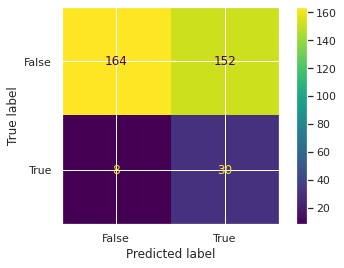

In [ ]:
cm_RF = metrics.confusion_matrix(y_test, pred_RF_under)
cm_display_RF = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_RF, display_labels = [False, True])

# cm_logr = metrics.confusion_matrix(y_test, pred_logr_over)
# cm_display_logr = metrics.ConfusionMatrixDisplay(confusion_matrix = cm_logr, display_labels = [False, True])

cm_display = [cm_display_RF]

plt.figure(figsize=(20,15))

for i in range(0, len(cm_display)):
    cm_display[i].plot()
    plt.show()

#### Explainer untuk RandomForestClassifier Undersampling

In [ ]:
#Membuat Explainer untuk RandomForestClassifier Undersampling
canceled_RF_under_exp = dx.Explainer(RF_under,x_rus, y_rus, label = "RandomForestClassifier Interpretation")

canceled_RF_under_exp.model_parts().plot()

Preparation of a new explainer is initiated

  -> data              : 246 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 246 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RandomForestClassifier Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f5434287af0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.02, mean = 0.499, max = 0.96
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.35, mean = 0.00146, max = 0.39
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
canceled_RF_under_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 11/11 [00:01<00:00,  5.74it/s]


#### Explainer untuk LogisticRegression Oversampling

In [ ]:
#Membuat Explainer untuk LogisticRegression Oversampling
canceled_logr_over_exp = dx.Explainer(logr_over,x_ros, y_ros, label = "LogristicRegression Interpretation")

canceled_logr_over_exp.model_parts().plot()

Preparation of a new explainer is initiated

  -> data              : 1404 rows 11 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 1404 values
  -> model_class       : sklearn.linear_model._logistic.LogisticRegression (default)
  -> label             : LogristicRegression Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f8b0cd18b80> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00802, mean = 0.5, max = 0.891
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.862, mean = -7.36e-05, max = 0.82
  -> model_info        : package sklearn

A new explainer has been created!


In [ ]:
canceled_logr_over_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 11/11 [00:00<00:00, 87.56it/s]


## Recommendations

# References:
* Dataset:

https://www.kaggle.com/datasets/kunal28chaturvedi/covid19-and-its-impact-on-students
* Publication (Journal):

https://www.sciencedirect.com/science/article/pii/S019074092032288X

atau

https://www.researchgate.net/publication/347935769_COVID-19_and_its_impact_on_education_social_life_and_mental_health_of_students_A_Survey

* Sleep hours:

https://www.cdc.gov/healthyschools/features/students-sleep.htm#:~:text=The%20American%20Academy%20of%20Sleep,10%20hours%20per%2024%20hours